In [150]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [152]:
# import csv file
# create a function to keep the data frame
airbnb = pd.read_csv(r'D:\One Drive\OneDrive\data analysis\data cleaning\airbnb new york/AB_NYC_2019.csv')

In [153]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [154]:
# Check for the null values in this data set
# airbnb.isnull()
# With this code we check the sum of null values 
# by column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [155]:
# Checking the dimensions of the data frame
airbnb.shape

(48895, 16)

In [156]:
# We notice that the id column has all the rows as unique values
# same number of unique values for all the table so is possible to drop it

airbnb.nunique()


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [157]:
airbnb.shape

(48895, 16)

In [158]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [159]:
# So with the null values dropped now we can drop the unnecessary columns
airbnb.drop(['id', 'name', 'last_review'], axis=1, inplace= True)



In [160]:
airbnb.loc[airbnb['reviews_per_month'].isna()].sample(5)


host_id     host_name neighbourhood_group     neighbourhood  \
28789   57470846       Melissa           Manhattan   Upper West Side   
44537   19109608          Elle              Queens           Astoria   
23020   48157058       Michèle            Brooklyn     Crown Heights   
44618  219517861  Sonder (NYC)           Manhattan  Theater District   
16786   76244490         Kunal            Brooklyn      Williamsburg   

       latitude  longitude        room_type  price  minimum_nights  \
28789  40.78472  -73.97575  Entire home/apt    175               3   
44537  40.76149  -73.92030     Private room     95               7   
23020  40.67541  -73.93253     Private room     26               7   
44618  40.75988  -73.98667  Entire home/apt    220              29   
16786  40.71605  -73.95180      Shared room     35              15   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
28789                  0                NaN                               1   
44537                  0                NaN                               3   
23020                  0                NaN                               1   
44618                  0                NaN                             327   
16786                  0                NaN                               1   

       availability_365  
28789                 0  
44537               356  
23020                59  
44618               333  
16786                 0

In [161]:
# Checking the number of null values for reviews_per_month
rev_df=airbnb.loc[airbnb['reviews_per_month'].isna()]
rev_df['number_of_reviews'].value_counts()

number_of_reviews
0    10052
Name: count, dtype: int64

In [162]:
# Filling with 0 as these have 0 reviews per month in the case that
# are null values
airbnb.fillna({'reviews_per_month':0},axis=0,inplace=True)

In [163]:
# now is time to verify if there are null values again
airbnb.isna().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [164]:
# with this code we check again the null values
# now we notice that there are not null values
airbnb.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [165]:
# Now we have to check the duplicated values
airbnb.duplicated().sum()

0

In [166]:
airbnb.head(5)

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [167]:
# This code helps to check if there are missing values

total_missing = airbnb.isna().sum().sum()
print(f"The total number of missing values in the DataFrame is: {total_missing}")


The total number of missing values in the DataFrame is: 21


In [168]:
# Dropping the missing values
airbnb.dropna(inplace=True)

In [169]:
# with this code we check again the null values
# now we notice that there are not null values
airbnb.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [170]:
# Now we use another filter to check if there are duplicated values
airbnb[airbnb.duplicated()]

Empty DataFrame
Columns: [host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [171]:
airbnb.shape

(48874, 13)

In [172]:
airbnb.head(10)

host_id    host_name neighbourhood_group       neighbourhood  latitude  \
0     2787         John            Brooklyn          Kensington  40.64749   
1     2845     Jennifer           Manhattan             Midtown  40.75362   
2     4632    Elisabeth           Manhattan              Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4     7192        Laura           Manhattan         East Harlem  40.79851   
5     7322        Chris           Manhattan         Murray Hill  40.74767   
6     7356        Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
7     8967     Shunichi           Manhattan      Hell's Kitchen  40.76489   
8     7490    MaryEllen           Manhattan     Upper West Side  40.80178   
9     7549          Ben           Manhattan           Chinatown  40.71344   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   
5  -73.97500  Entire home/apt    200               3                 74   
6  -73.95596     Private room     60              45                 49   
7  -73.98493     Private room     79               2                430   
8  -73.96723     Private room     79               2                118   
9  -73.99037  Entire home/apt    150               1                160   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [173]:
# This code helps to check general Statistics
airbnb.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.887400e+04  48874.000000  48874.000000  48874.000000    48874.000000   
mean   6.762157e+07     40.728946    -73.952172    152.738634        7.031387   
std    7.861415e+07      0.054529      0.046156    240.199728       20.514423   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.823258e+06     40.690100    -73.983078     69.000000        1.000000   
50%    3.079257e+07     40.723065    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763110    -73.936273    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48874.000000       48874.000000                    48874.000000   
mean           23.266358           1.090785                        7.146458   
std            44.544330           1.597119                       32.959378   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48874.000000  
mean         112.793755  
std          131.619934  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [174]:
# Analyzing the data types
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48874 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48874 non-null  int64  
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48874 non-null  object 
 3   neighbourhood                   48874 non-null  object 
 4   latitude                        48874 non-null  float64
 5   longitude                       48874 non-null  float64
 6   room_type                       48874 non-null  object 
 7   price                           48874 non-null  int64  
 8   minimum_nights                  48874 non-null  int64  
 9   number_of_reviews               48874 non-null  int64  
 10  reviews_per_month               48874 non-null  float64
 11  calculated_host_listings_count  48874 non-null  int64  
 12  availability_365                48874

In [175]:
# listing all the unique names for the neighbourhood_group column
neighbourhood_gp = airbnb['neighbourhood_group'].unique()
print(neighbourhood_gp)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [176]:
# with this code we list the total number of unique airbnbs by neighbourhood_group
airbnb.groupby('neighbourhood_group').agg({'neighbourhood':'nunique'})

neighbourhood
neighbourhood_group               
Bronx                           48
Brooklyn                        47
Manhattan                       32
Queens                          51
Staten Island                   43

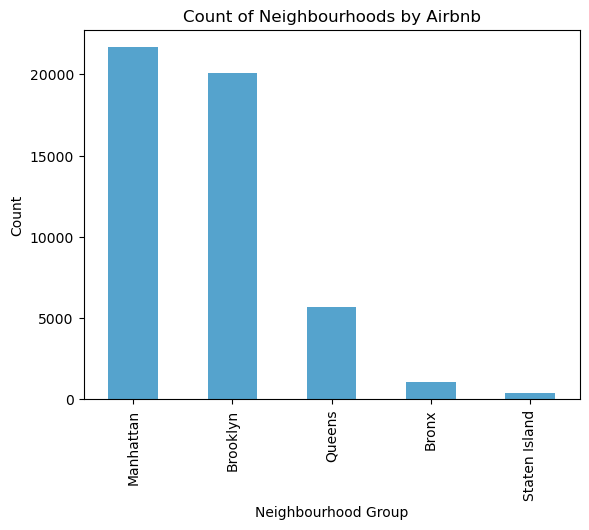

In [177]:
# barchart about count the airbnbs by neighbourhood_group
# Group by neighbourhood_group and count the occurrences

# creating an operation to count the number of unique airbnbs 
neighbourhood_counts = airbnb['neighbourhood_group'].value_counts()

# Create the bar chart
neighbourhood_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Neighbourhoods by Airbnb')

# Show the plot
plt.show()

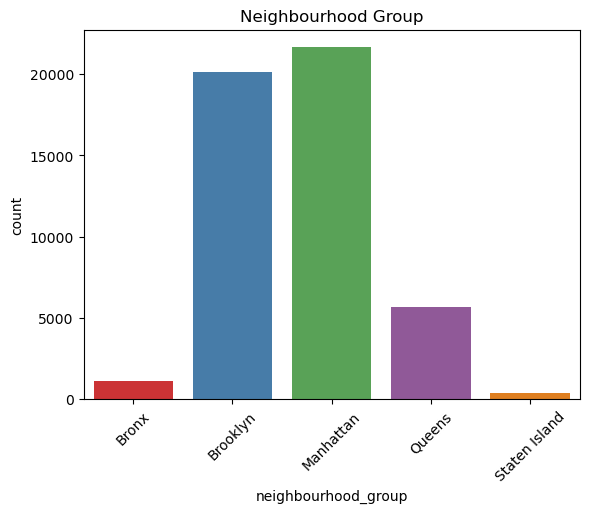

In [178]:
# Creating the same barchart with different colors
# Convert 'neighbourhood_group' to a categorical data type
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].astype('category')

# Create the countplot
sns.countplot(data=airbnb, x='neighbourhood_group', palette='Set1')
plt.title('Neighbourhood Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

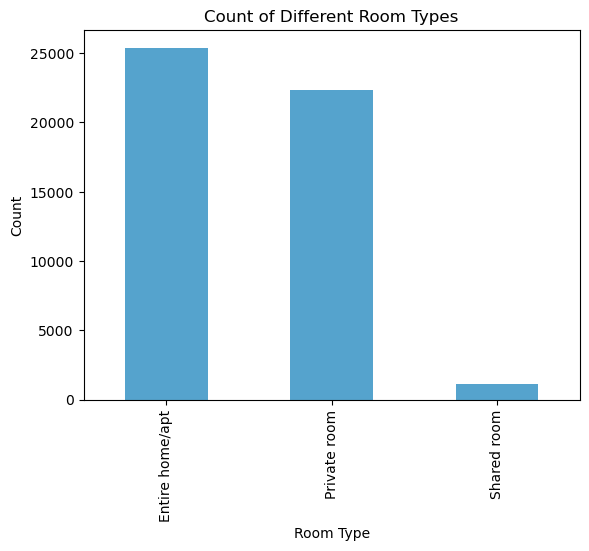

In [179]:
# Group by room_type and count the occurrences
room_type_counts = airbnb['room_type'].value_counts()

# Create the bar chart
room_type_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Different Room Types')

# Show the plot
plt.show()

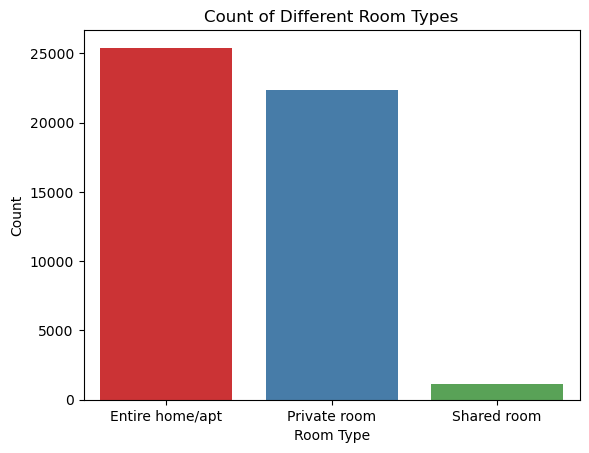

In [33]:
# Group by room_type and count the occurrences
room_type_counts = airbnb['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

# Create the bar chart using seaborn
sns.barplot(x='room_type', y='count', data=room_type_counts, palette='Set1')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Different Room Types')

# Show the plot
plt.show()


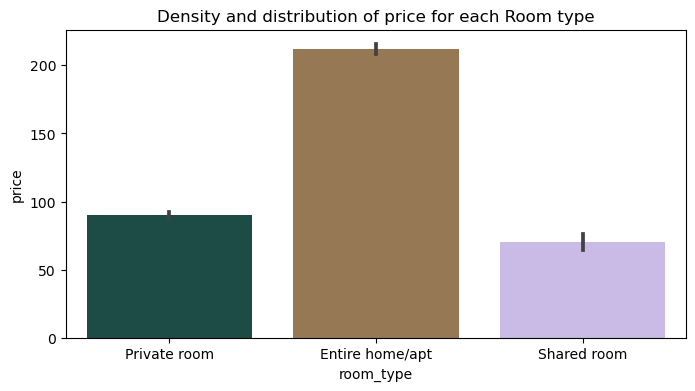

In [34]:
# Bar chart about the distribution prices by room types
plt.figure(figsize = (8,4))
sns.barplot(x='room_type', y="price", data=airbnb, palette='cubehelix') 
plt.title('Density and distribution of price for each Room type')
plt.show()

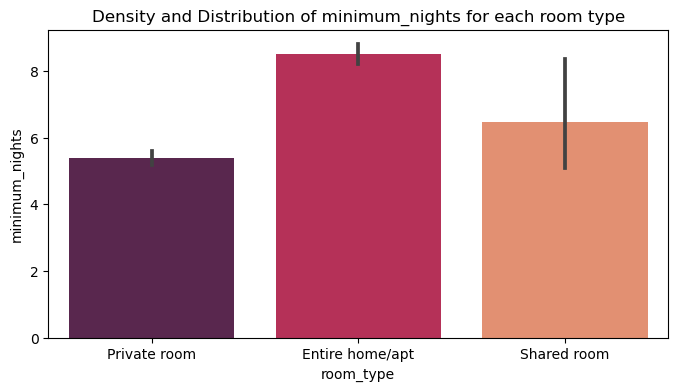

In [35]:
# Visualizing distribution of minimum_nights for each room type

plt.figure(figsize = (8,4))
plt.title('Density and Distribution of minimum_nights for each room type')
sns.barplot(x = 'room_type', y = 'minimum_nights', data = airbnb, palette='rocket')
plt.show()

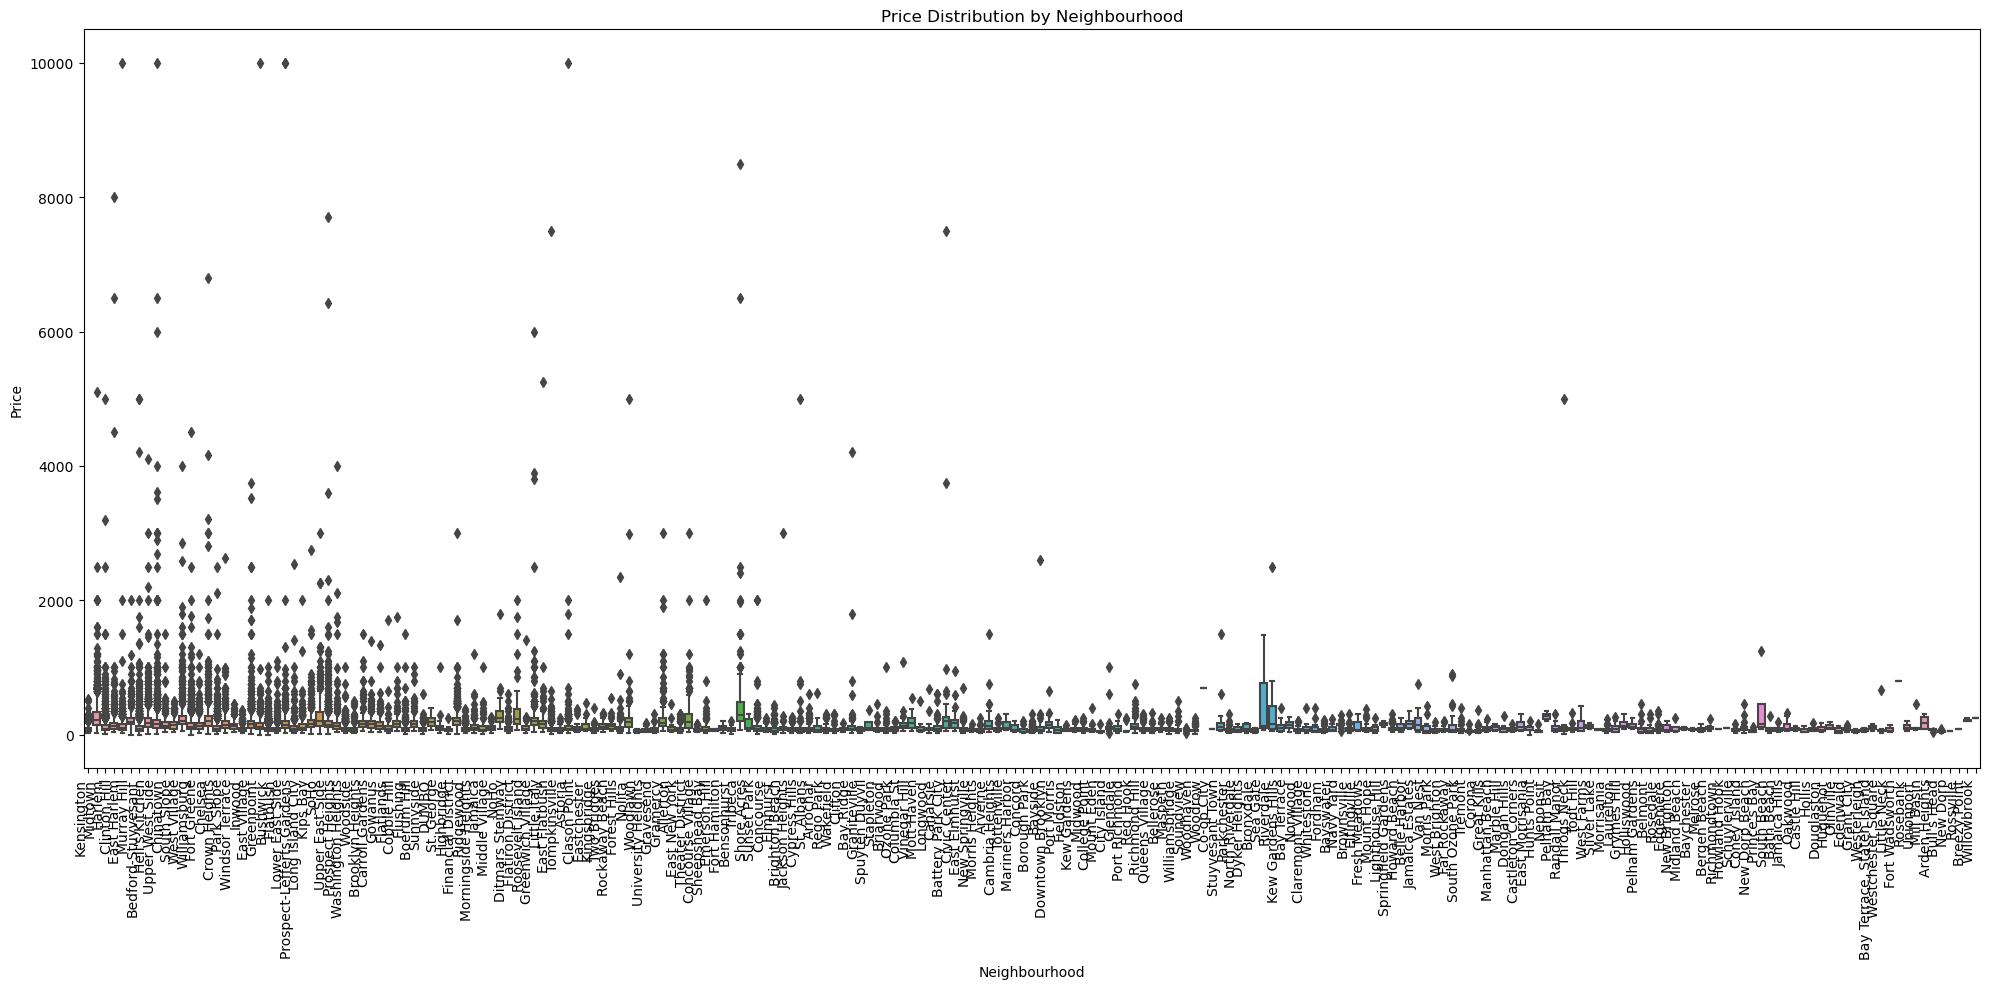

In [180]:
# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Create the box plot using seaborn
sns.boxplot(data=airbnb, x='neighbourhood', y='price')

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighbourhood')

# Rotate x labels for better readability
# Rotate x labels for better readability and adjust alignment
plt.xticks(rotation=90, ha='right')

# Adjust the subplot parameters to give more space for the x labels
plt.subplots_adjust(bottom=0.6)


# Show the plot
plt.tight_layout()
plt.show()

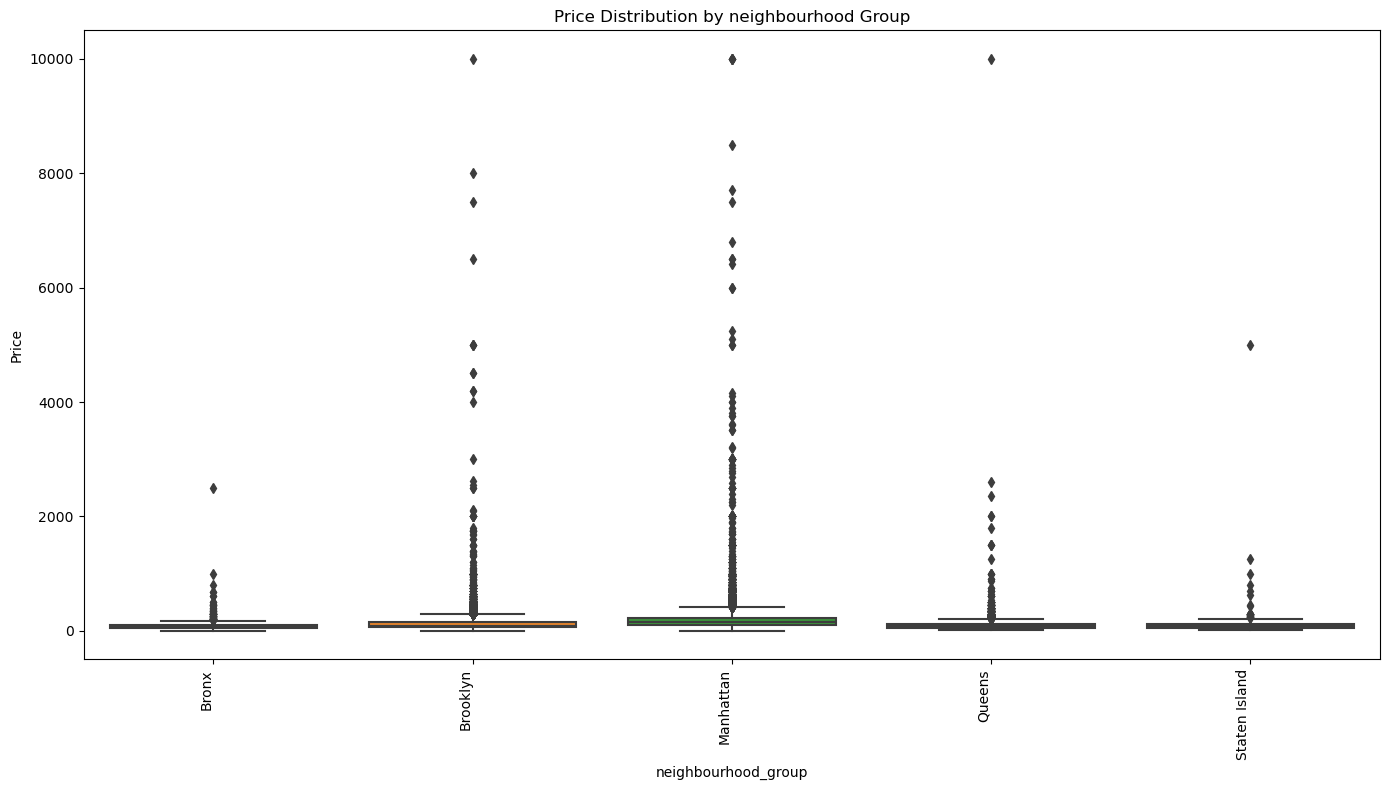

In [37]:
# With this code we notice prices distribution in the different neighbourhood Groups
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create the box plot using seaborn
sns.boxplot(data=airbnb, x='neighbourhood_group', y='price')

# Add labels and title
plt.xlabel('neighbourhood_group')
plt.ylabel('Price')
plt.title('Price Distribution by neighbourhood Group')

# Rotate x labels for better readability
# Rotate x labels for better readability and adjust alignment
plt.xticks(rotation=90, ha='right')



# Show the plot
plt.tight_layout()
plt.show()

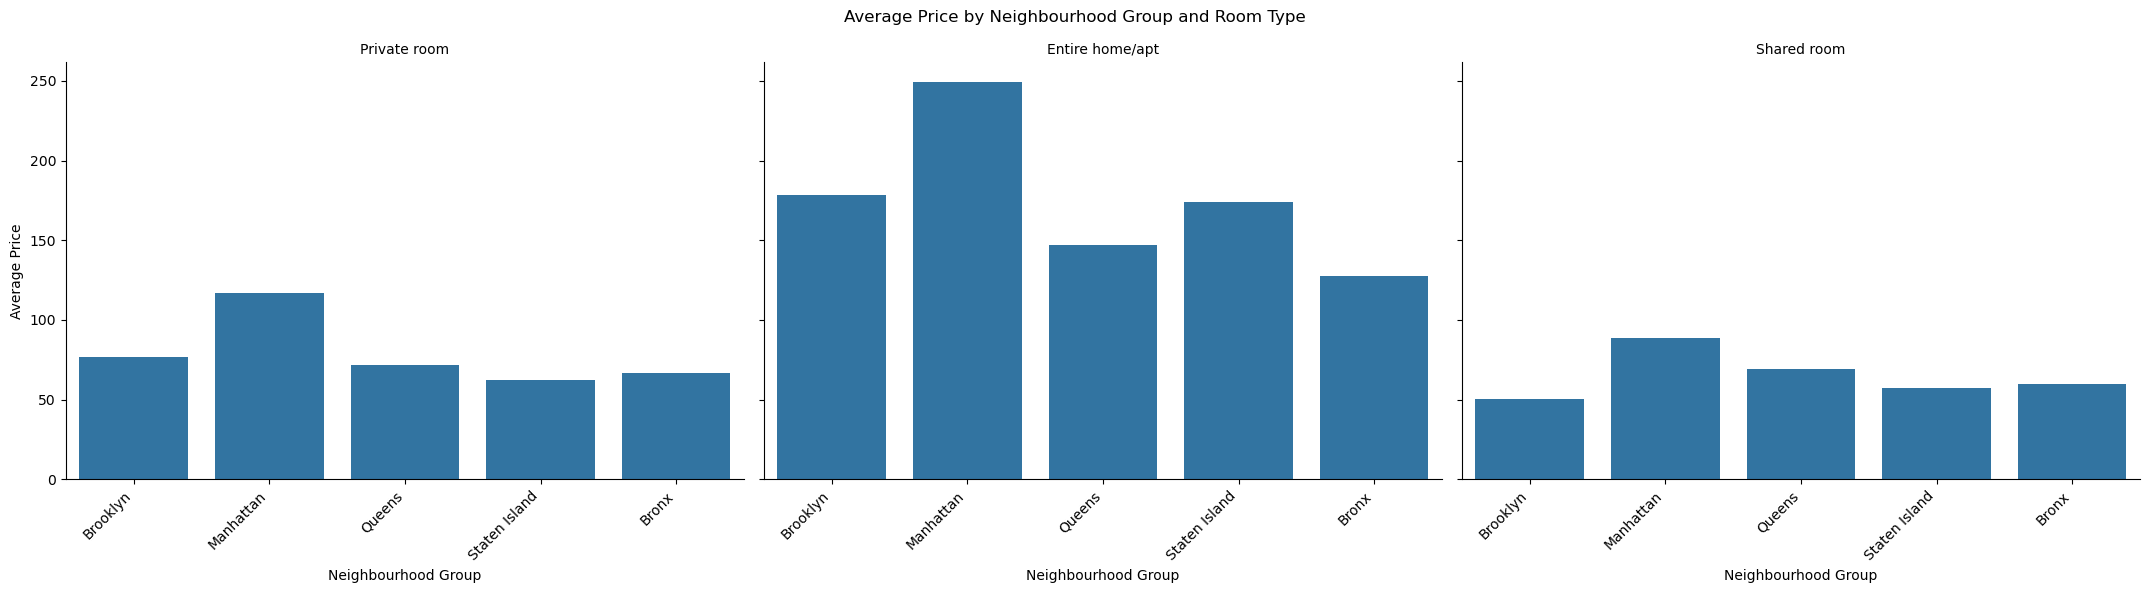

In [39]:
# With this code I show the average prices by neighbourhood_group according with the room type

# Set the figure size for better readability
g = sns.FacetGrid(airbnb, col="room_type", height=6, aspect=1.2)

# Define a function to create a bar plot
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y, **kwargs, ci=None)

# Map a bar plot to the grid
g.map(barplot, "neighbourhood_group", "price", order=airbnb['neighbourhood_group'].unique())

# Add labels and title
g.set_axis_labels("Neighbourhood Group", "Average Price")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Price by Neighbourhood Group and Room Type')

# Rotate x labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Show the plot
plt.tight_layout()
plt.show()

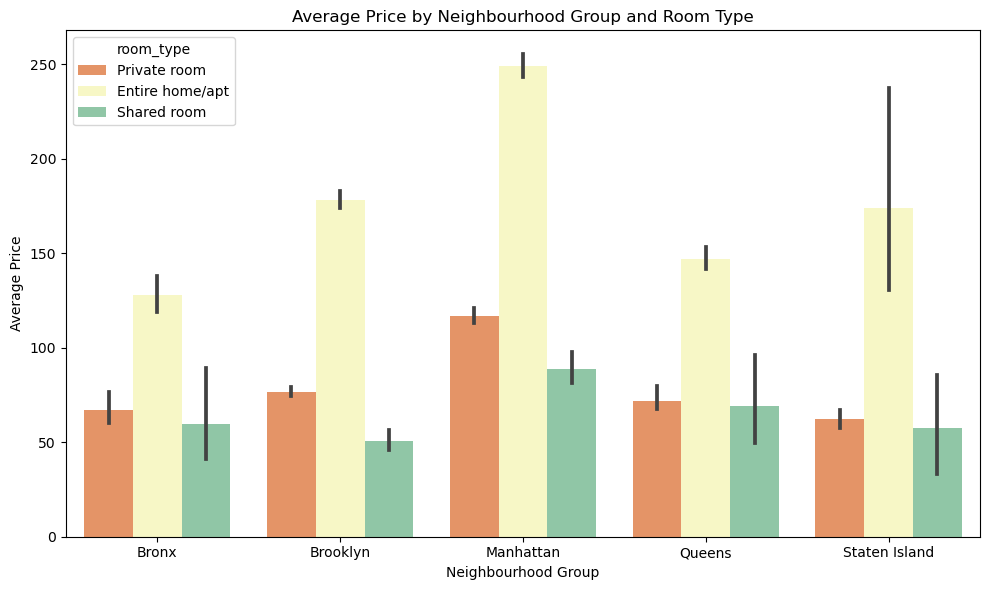

In [40]:
# With this code I show the average prices by room type and divided by Neighbourhood Groups

# Set the custom palette
custom_palette = "Spectral"

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=airbnb, x='neighbourhood_group', y='price', hue='room_type', palette=custom_palette)

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group and Room Type')

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
# Analyzing the average price by neighbourhood group
airbnb.groupby('neighbourhood_group')['price'].mean().sort_values()

# we notice that the most expensive neighbourhood is Manhattan and the cheapest is Bronx


neighbourhood_group
Bronx             87.508257
Queens            99.536017
Staten Island    114.812332
Brooklyn         124.398009
Manhattan        196.895853
Name: price, dtype: float64

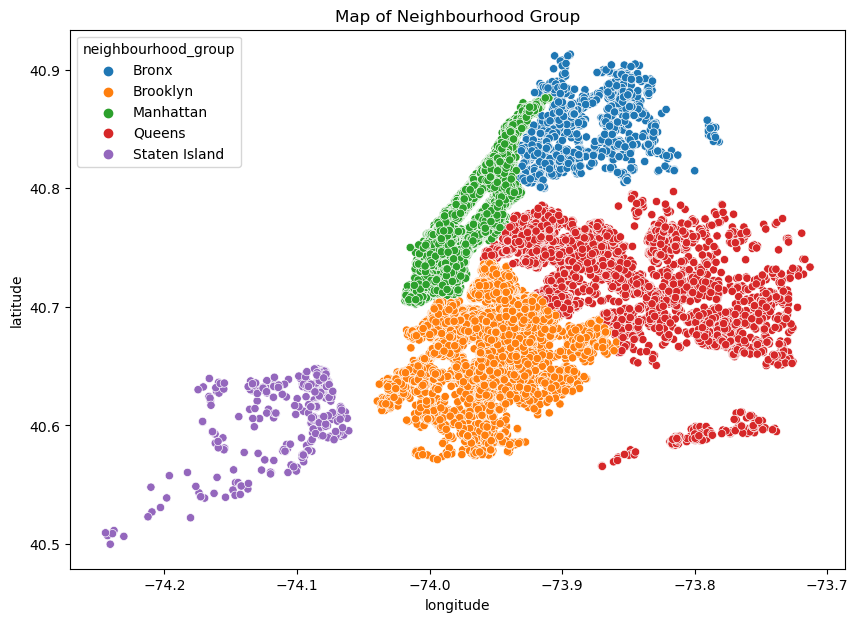

In [42]:
# Showing the distribution map of the airbnbs by neighbourhood_group
plt.figure(figsize=(10, 7))

# we use the columns longitude and latitude to determine the geo locations
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Map of Neighbourhood Group')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()

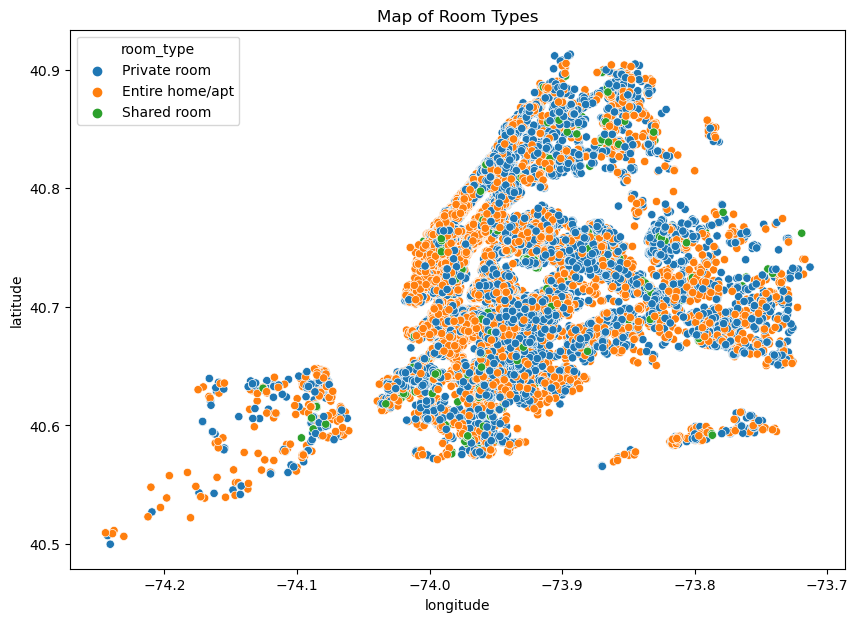

In [43]:
# Showing the distribution map of the airbnbs by room types
plt.figure(figsize=(10, 7))

# we use the columns longitude and latitude to determine the geo locations
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='room_type')
plt.title('Map of Room Types')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()

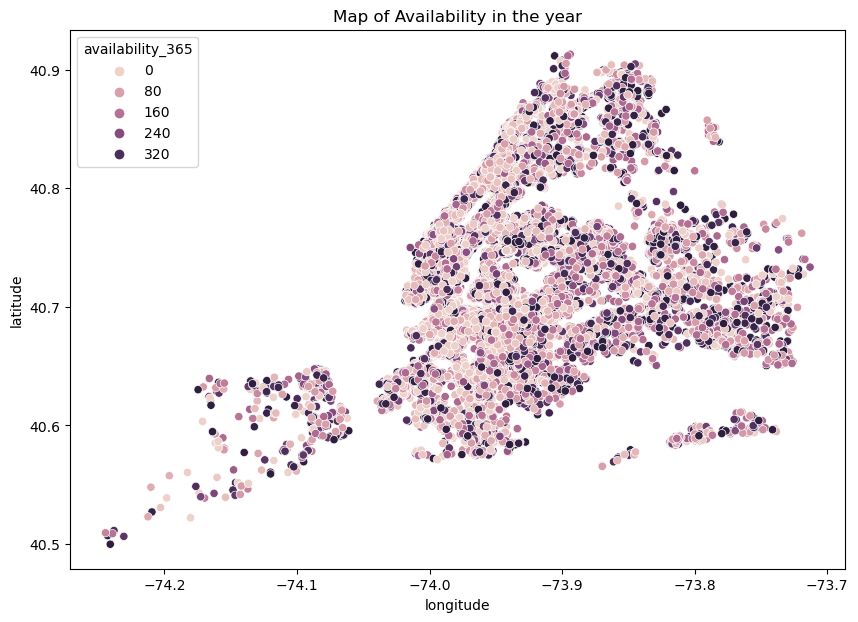

In [44]:
# Showing the distribution map of the airbnbs by availability_365
plt.figure(figsize=(10, 7))

# we use the columns longitude and latitude to determine the geo locations
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='availability_365')
plt.title('Map of Availability in the year')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()

In [45]:
# Analyzing the number of nights statistics
airbnb.price.describe()


count    48874.000000
mean       152.738634
std        240.199728
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# # Showing the distribution map of the airbnbs by prices from the lowest to the highest


plt.figure(figsize=(15, 12))
sns.set_palette('cubehelix')

sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='price', palette='cubehelix')
plt.title('Range of prices')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()

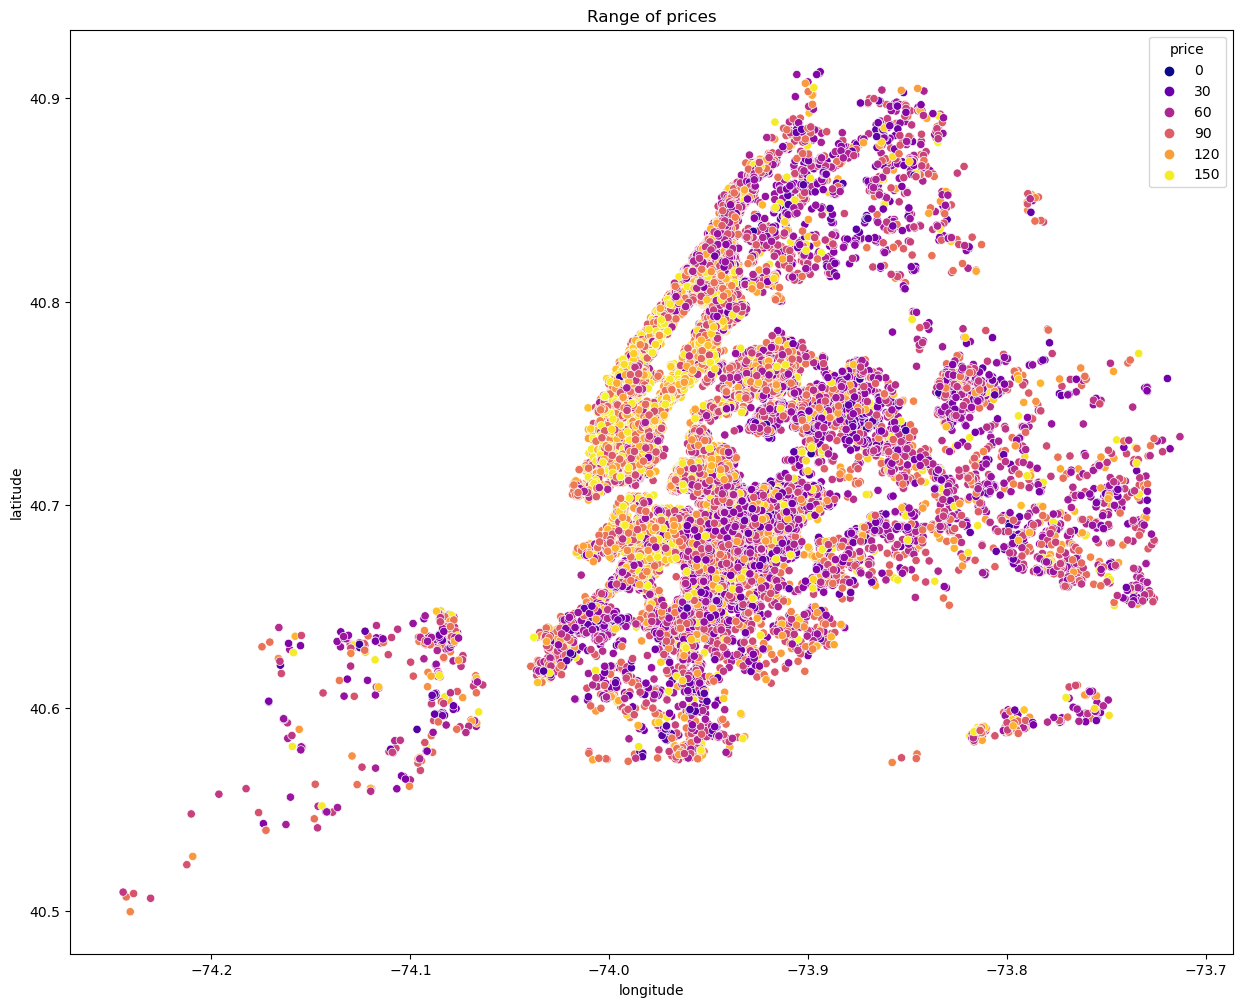

In [47]:
# show the range of prices less than the average price
p_minavg=airbnb[airbnb.price < 156]

plt.figure(figsize=(15, 12))
sns.set_palette('plasma')

sns.scatterplot(data=p_minavg, x='longitude', y='latitude', hue='price', palette='plasma')
plt.title('Range of prices')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()


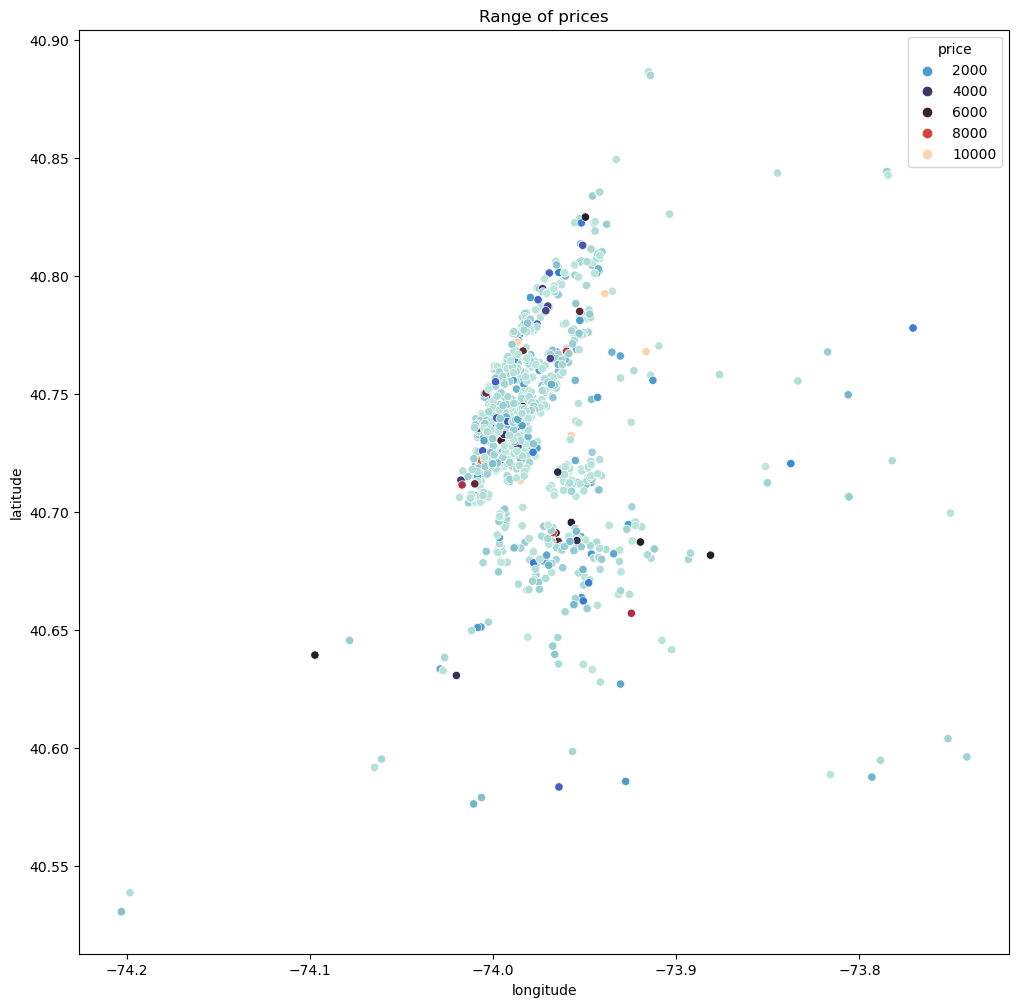

In [48]:
# show the range of prices more than the average price
p_minavg=airbnb[airbnb.price > 500]

plt.figure(figsize=(12, 12))
sns.set_palette('icefire')

sns.scatterplot(data=p_minavg, x='longitude', y='latitude', hue='price', palette='icefire')
plt.title('Range of prices')
# plt.ioff()  # Disable interactive mode for displaying the plot

plt.show()


In [50]:
# Sort the data frame by minimum_nights descending mode to check higher minimum_nights
sorted_Host_ID = airbnb.sort_values(by='price', ascending=False)
sorted_Host_ID

host_id     host_name neighbourhood_group       neighbourhood  \
29238   72390391        Jelena           Manhattan     Upper West Side   
9151    20582832      Kathrine              Queens             Astoria   
17692    5143901          Erin            Brooklyn          Greenpoint   
40433    4382127          Matt           Manhattan     Lower East Side   
6530     1235070         Olson           Manhattan         East Harlem   
...          ...           ...                 ...                 ...   
26841  101970559        Sergii            Brooklyn            Bushwick   
25795   86327101       Adeyemi            Brooklyn  Bedford-Stuyvesant   
25796   86327101       Adeyemi            Brooklyn  Bedford-Stuyvesant   
23161    8993084      Kimberly            Brooklyn  Bedford-Stuyvesant   
25634   15787004  Martial Loft            Brooklyn            Bushwick   

       latitude  longitude        room_type  price  minimum_nights  \
29238  40.77213  -73.98665  Entire home/apt  10000              30   
9151   40.76810  -73.91651     Private room  10000             100   
17692  40.73260  -73.95739  Entire home/apt  10000               5   
40433  40.71980  -73.98566  Entire home/apt   9999              30   
6530   40.79264  -73.93898  Entire home/apt   9999               5   
...         ...        ...              ...    ...             ...   
26841  40.69211  -73.90670      Shared room      0              30   
25795  40.68279  -73.91170     Private room      0               1   
25796  40.68258  -73.91284     Private room      0               1   
23161  40.69023  -73.95428     Private room      0               4   
25634  40.69467  -73.92433     Private room      0               2   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
29238                  0               0.00                               1   
9151                   2               0.04                               1   
17692                  5               0.16                               1   
40433                  0               0.00                               1   
6530                   1               0.02                               1   
...                  ...                ...                             ...   
26841                  2               0.11                               6   
25795                 95               4.37                               6   
25796                 95               4.35                               6   
23161                  1               0.05                               4   
25634                 16               0.71                               5   

       availability_365  
29238                83  
9151                  0  
17692                 0  
40433               365  
6530                  0  
...                 ...  
26841               333  
25795               232  
25796               222  
23161                28  
25634                 0  

[48874 rows x 13 columns]

In [51]:
airbnb.head(2)

host_id host_name neighbourhood_group neighbourhood  latitude  longitude  \
0     2787      John            Brooklyn    Kensington  40.64749  -73.97237   
1     2845  Jennifer           Manhattan       Midtown  40.75362  -73.98377   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355

Which hosts are the busiest and why? 

In [52]:
# Showing with a bar graph the higher hosted times
# Calculate the number of listings for each host
host_listings = airbnb['host_id'].value_counts().reset_index()
host_listings.columns = ['host_id', 'number_of_listings']

# Sort the data to get the top 10 hosts by number of listings
top_hosts = host_listings.head(10)


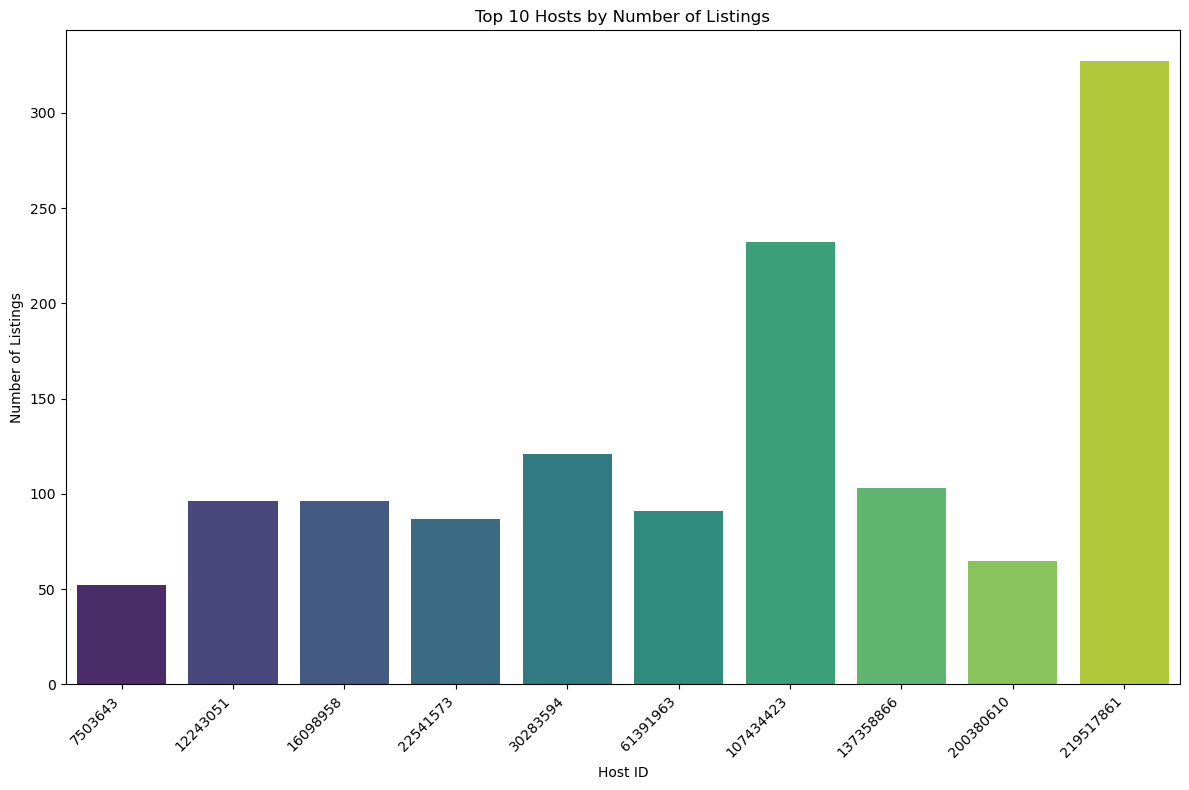

In [53]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the bar plot using seaborn
sns.barplot(data=top_hosts, x='host_id', y='number_of_listings', palette='viridis')

# Sort the data to get the top 10 hosts by number of listings


# Add labels and title
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Top 10 Hosts by Number of Listings')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
# Sort the data frame by minimum_nights descending mode to check higher minimum_nights
sorted_Host_ID = airbnb.sort_values(by='host_id', ascending=False)
sorted_Host_ID

host_id  host_name neighbourhood_group       neighbourhood  latitude  \
48888  274321313        Kat           Manhattan      Hell's Kitchen  40.76392   
48886  274311461      Scott           Manhattan             Midtown  40.75561   
48884  274307600   Jonathan            Brooklyn        Williamsburg  40.71790   
48881  274298453     Adrien            Brooklyn          Greenpoint  40.72585   
48875  274273284  Anastasia           Manhattan         East Harlem  40.78749   
...          ...        ...                 ...                 ...       ...   
13583       2787       John            Brooklyn           Gravesend  40.60755   
10372       2787       John            Brooklyn         Bensonhurst  40.60951   
0           2787       John            Brooklyn          Kensington  40.64749   
2290        2571      Teedo            Brooklyn  Bedford-Stuyvesant  40.68674   
30604       2438      Tasos            Brooklyn        Williamsburg  40.71412   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48888  -73.99183     Private room    125               4                  0   
48886  -73.96723  Entire home/apt    200               6                  0   
48884  -73.96238     Private room    190               7                  0   
48881  -73.94001     Private room     54               6                  0   
48875  -73.94749     Private room    140               1                  0   
...          ...              ...    ...             ...                ...   
13583  -73.97410     Private room     79               1                 17   
10372  -73.97622     Private room     99               1                 21   
0      -73.97237     Private room    149               1                  9   
2290   -73.93845  Entire home/apt    182               9                 27   
30604  -73.94447  Entire home/apt     95              45                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
48888               0.00                               1                31  
48886               0.00                               1               176  
48884               0.00                               1               341  
48881               0.00                               1                15  
48875               0.00                               1               180  
...                  ...                             ...               ...  
13583               0.40                               6               174  
10372               0.50                               6               153  
0                   0.21                               6               365  
2290                0.37                               1                23  
30604               0.06                               1                 0  

[48874 rows x 13 columns]

In [55]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48874 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48874 non-null  int64   
 1   host_name                       48874 non-null  object  
 2   neighbourhood_group             48874 non-null  category
 3   neighbourhood                   48874 non-null  object  
 4   latitude                        48874 non-null  float64 
 5   longitude                       48874 non-null  float64 
 6   room_type                       48874 non-null  object  
 7   price                           48874 non-null  int64   
 8   minimum_nights                  48874 non-null  int64   
 9   number_of_reviews               48874 non-null  int64   
 10  reviews_per_month               48874 non-null  float64 
 11  calculated_host_listings_count  48874 non-null  int64   
 12  availability_365       

In [56]:

# latitude longitude price minimum_nights number_of_reviews reviews_per_month calculated_host_listings_count availability_365
airbnb.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [182]:
# Analyzing the correlation according with these different columns
# We have to create a new data frame for just the numeric data (int and float)

corr = airbnb[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
             'availability_365', 'latitude', 'longitude', 'reviews_per_month']]
corr.corr()

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.042793          -0.047939   
minimum_nights                  0.042793        1.000000          -0.080113   
number_of_reviews              -0.047939       -0.080113           1.000000   
calculated_host_listings_count  0.057460        0.127952          -0.072378   
availability_365                0.081841        0.144267           0.171859   
latitude                        0.033943        0.024934          -0.015239   
longitude                      -0.149997       -0.062742           0.059147   
reviews_per_month              -0.050576       -0.124911           0.589259   

                                calculated_host_listings_count  \
price                                                 0.057460   
minimum_nights                                        0.127952   
number_of_reviews                                    -0.072378   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225739   
latitude                                              0.019534   
longitude                                            -0.114729   
reviews_per_month                                    -0.047325   

                                availability_365  latitude  longitude  \
price                                   0.081841  0.033943  -0.149997   
minimum_nights                          0.144267  0.024934  -0.062742   
number_of_reviews                       0.171859 -0.015239   0.059147   
calculated_host_listings_count          0.225739  0.019534  -0.114729   
availability_365                        1.000000 -0.010783   0.082749   
latitude                               -0.010783  1.000000   0.084850   
longitude                               0.082749  0.084850   1.000000   
reviews_per_month                       0.163749 -0.018755   0.138752   

                                reviews_per_month  
price                                   -0.050576  
minimum_nights                          -0.124911  
number_of_reviews                        0.589259  
calculated_host_listings_count          -0.047325  
availability_365                         0.163749  
latitude                                -0.018755  
longitude                                0.138752  
reviews_per_month                        1.000000

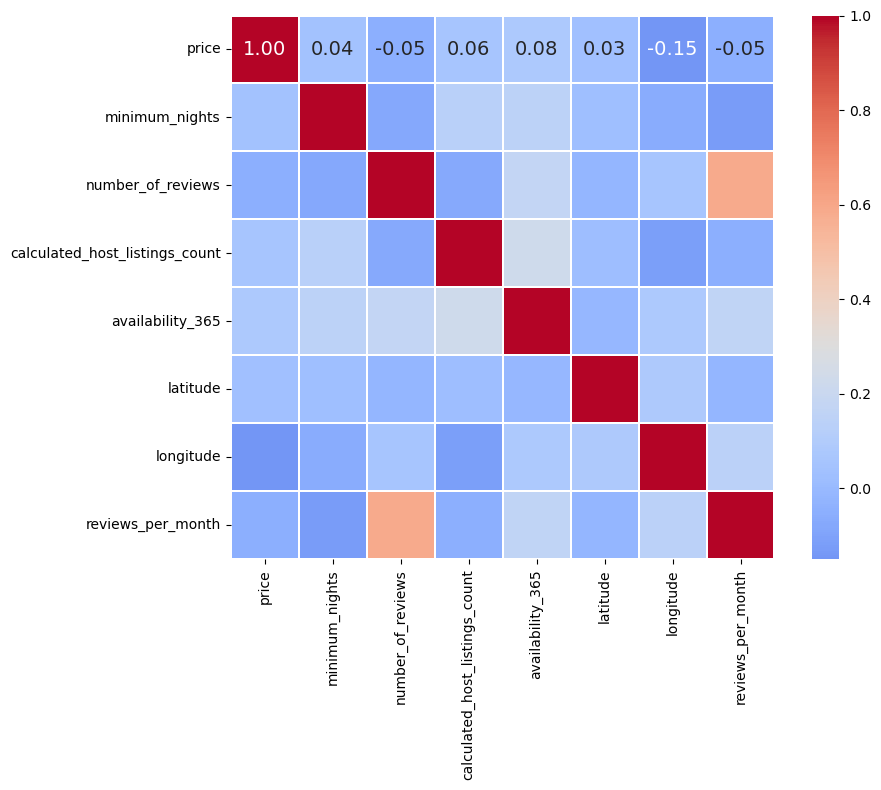

In [183]:
# With this code I show the correlations of the variables

plt.figure(figsize=[10, 8])
sns.heatmap(corr.corr(),
            annot=True ,
            fmt = '.2f',
            annot_kws={"fontsize": 14},
            linewidths=0.25,
            center= 0.3,
            cmap= 'coolwarm',
            square=True)

plt.tight_layout()
plt.show()

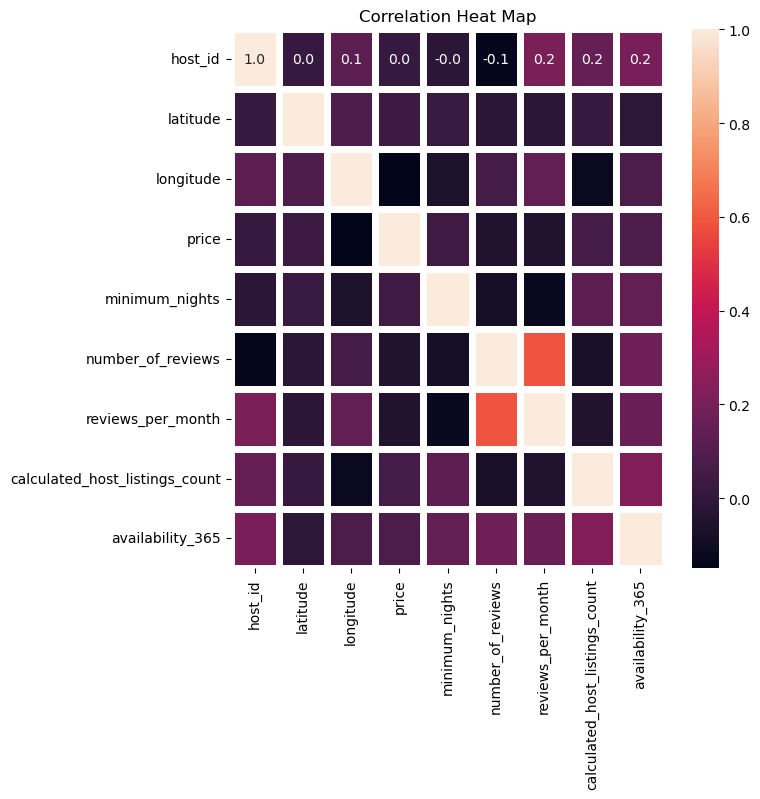

In [59]:
# Correlation Heatmap visualization code

# Selecting only numeric columns for correlation analysis
numeric_columns = airbnb.select_dtypes(include=['float64', 'int64']).columns

# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')

# Use only numeric columns for correlation matrix
sns.heatmap(airbnb[numeric_columns].corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

plt.show()

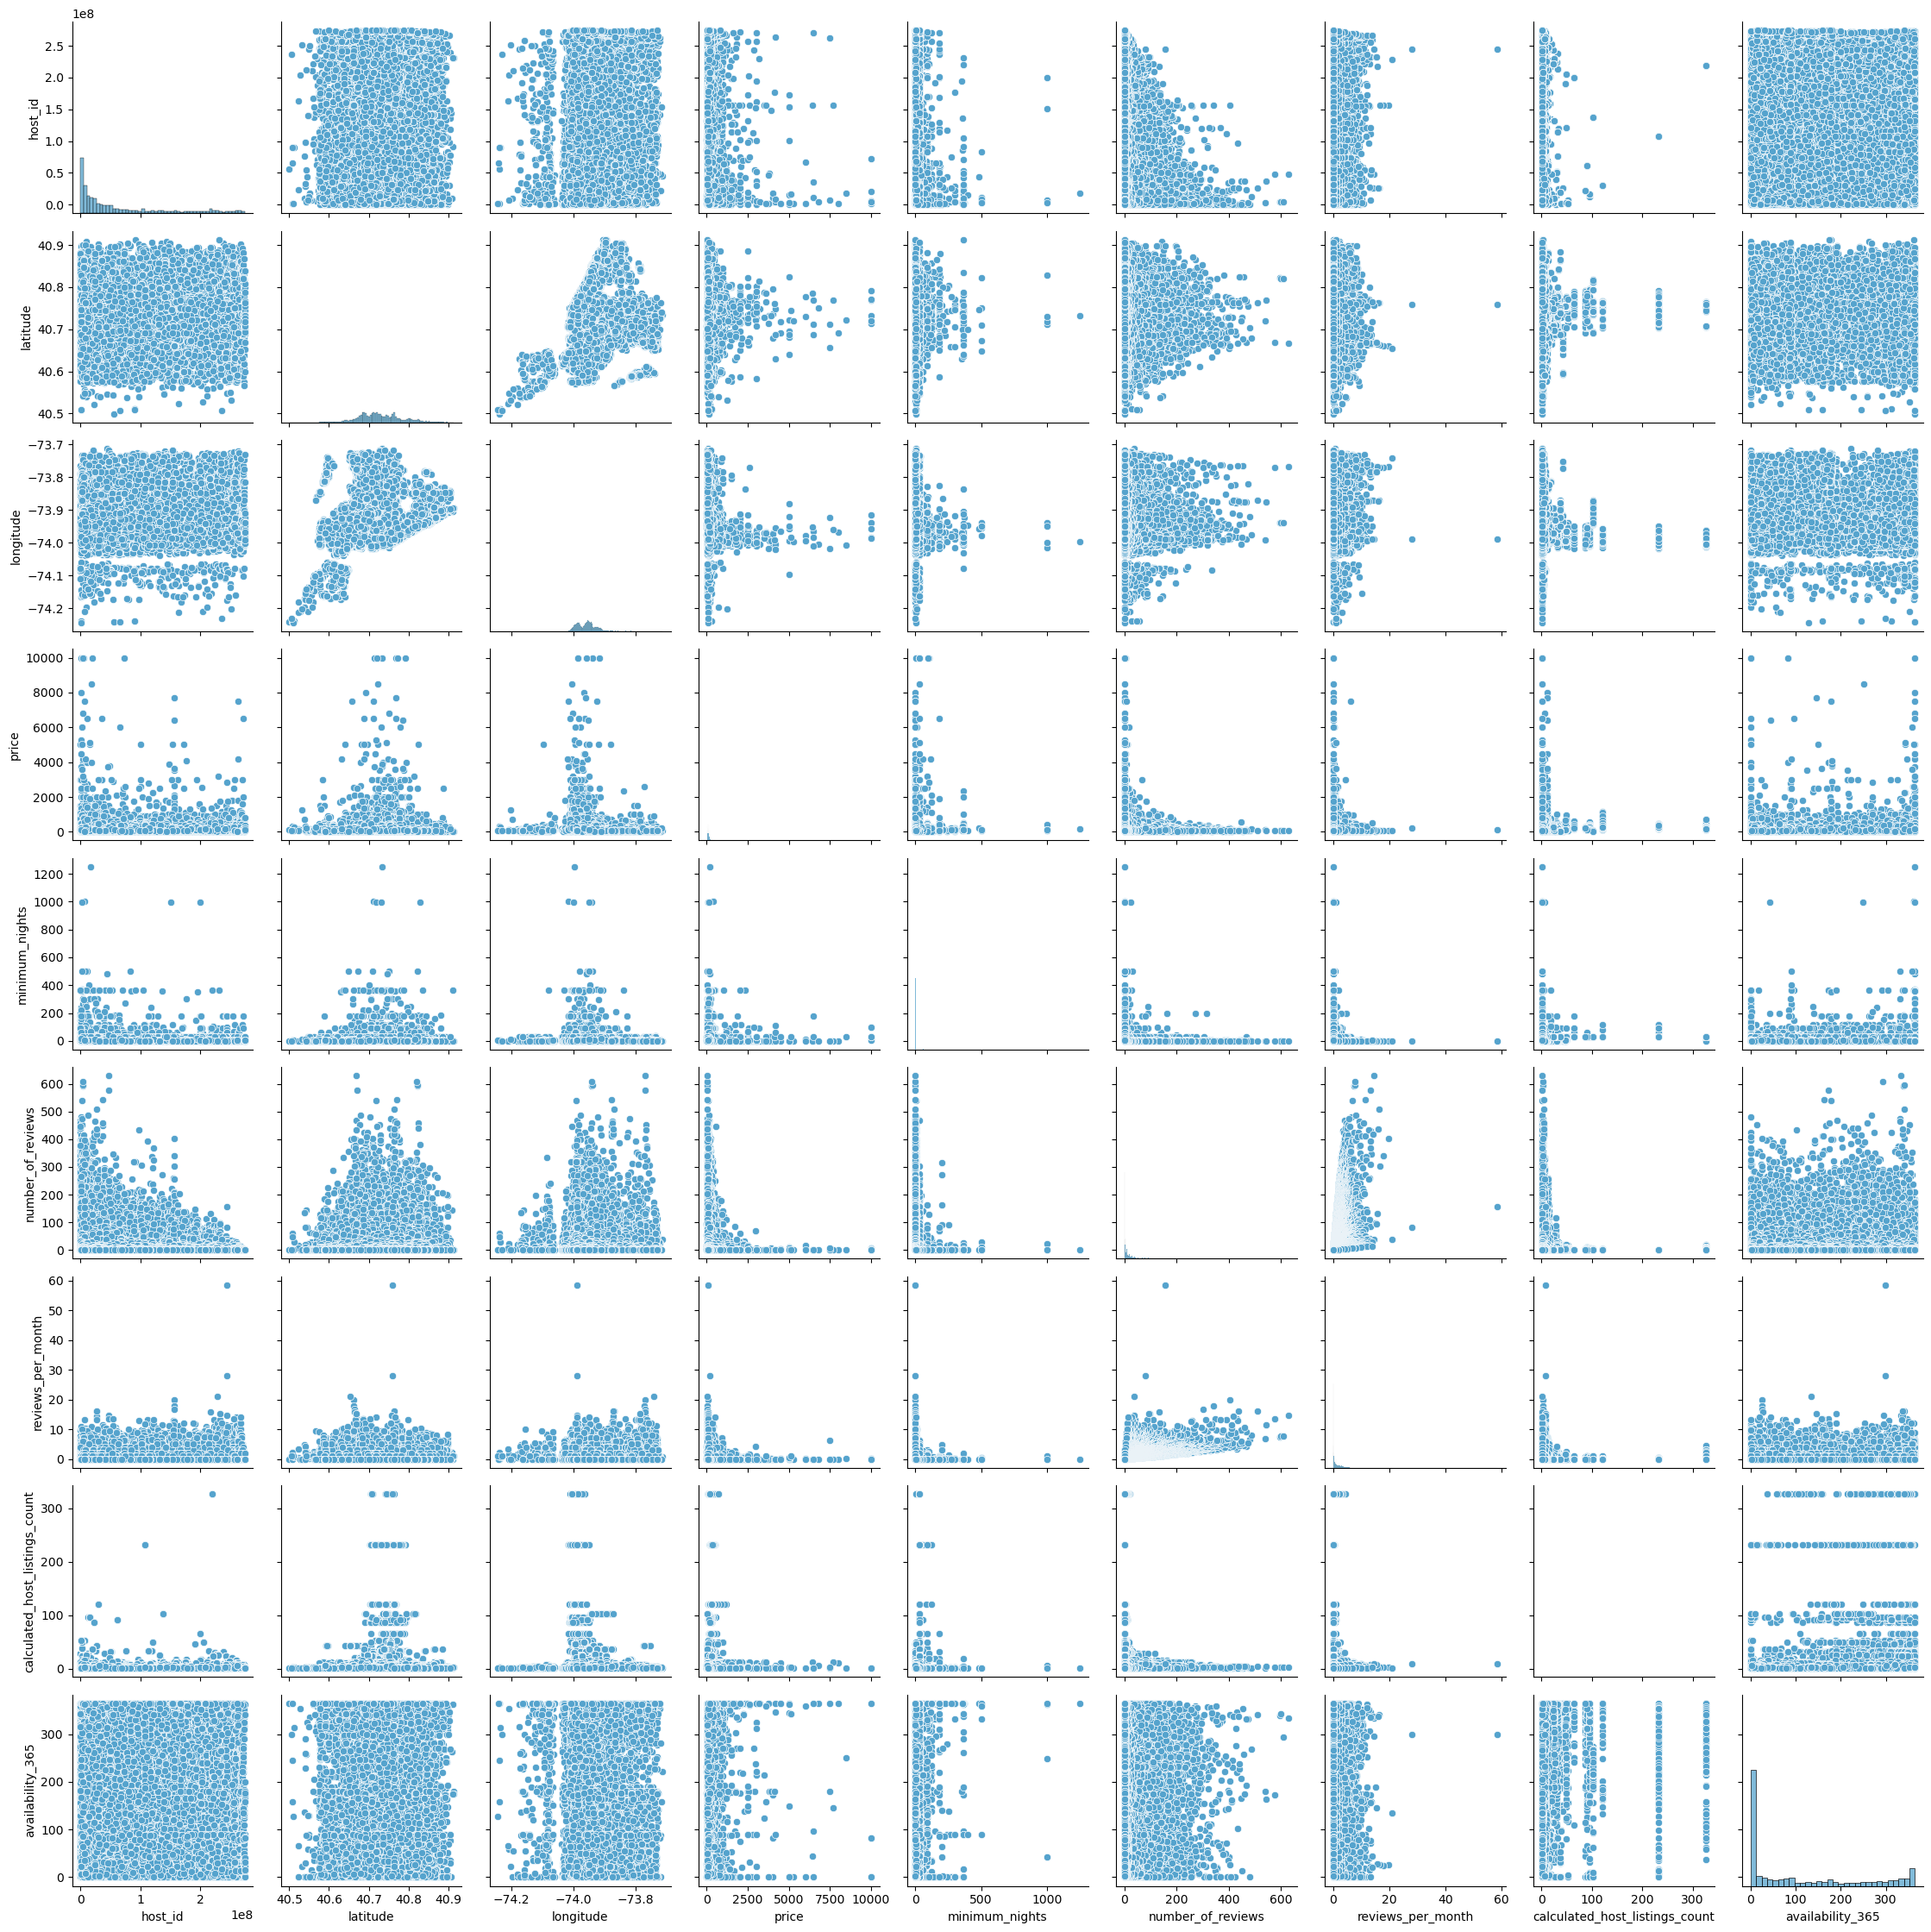

In [60]:
# with this code we use pairplots that are useful for visualizing relationships between
# multiple numerical variables and for detecting patterns, correlations, and outliers in the dataset.

sns.pairplot(airbnb)

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

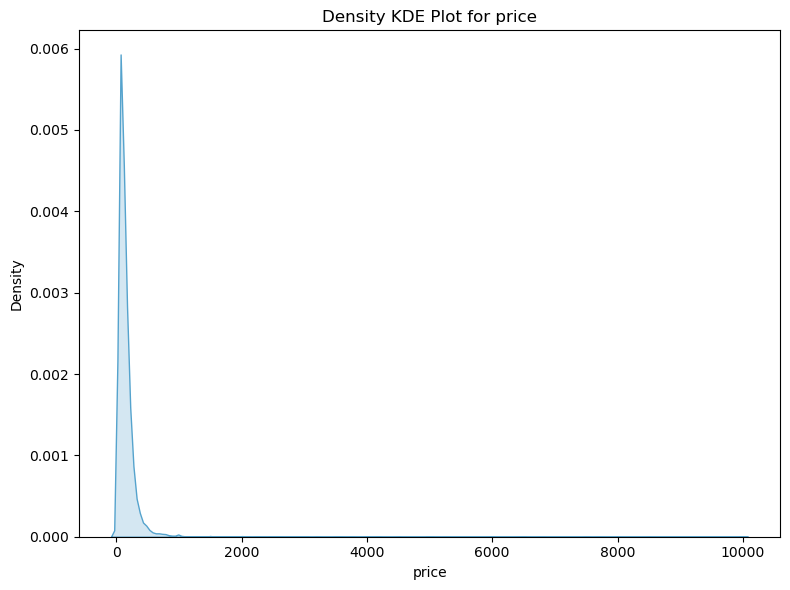

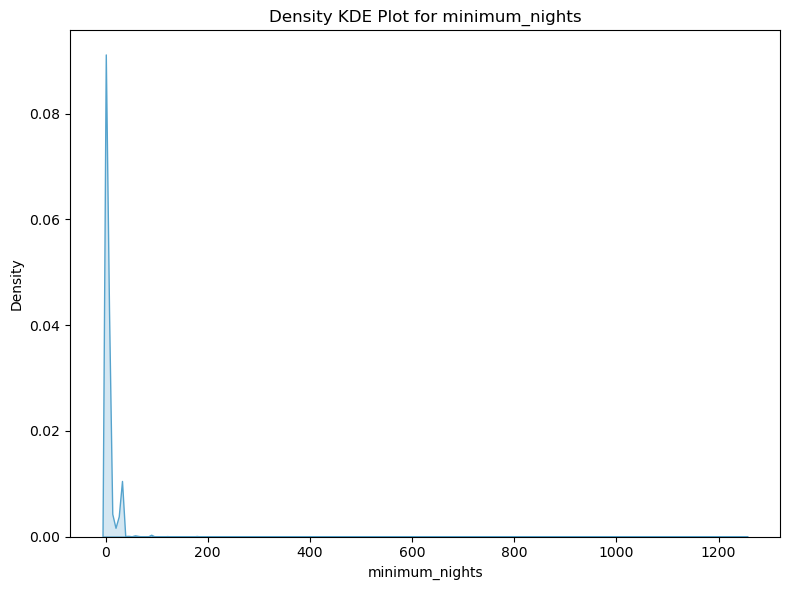

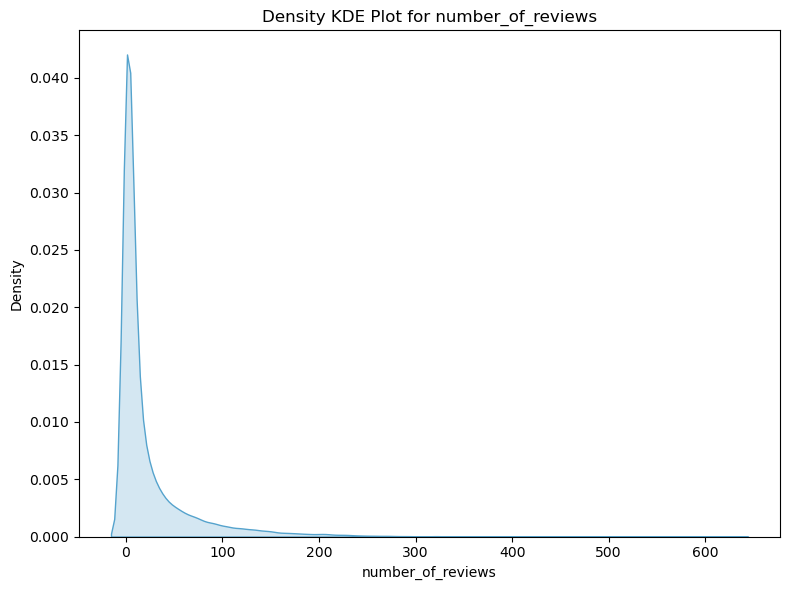

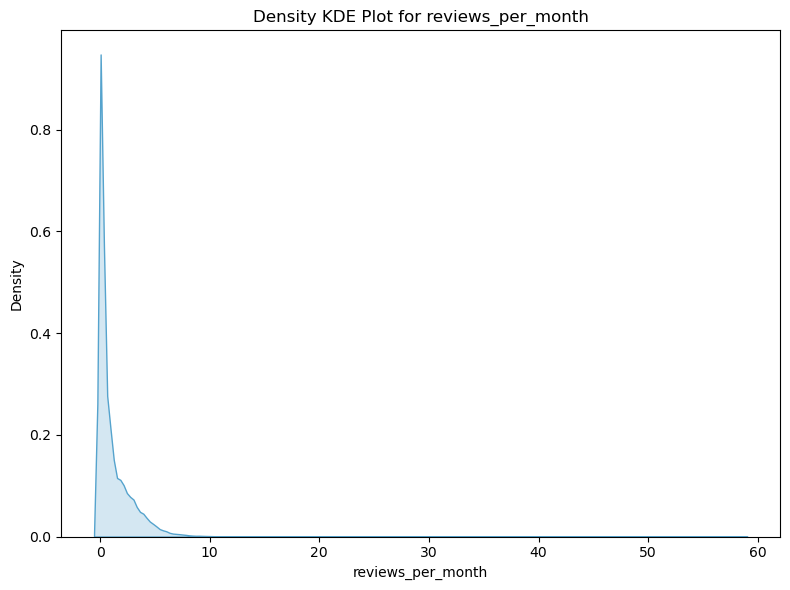

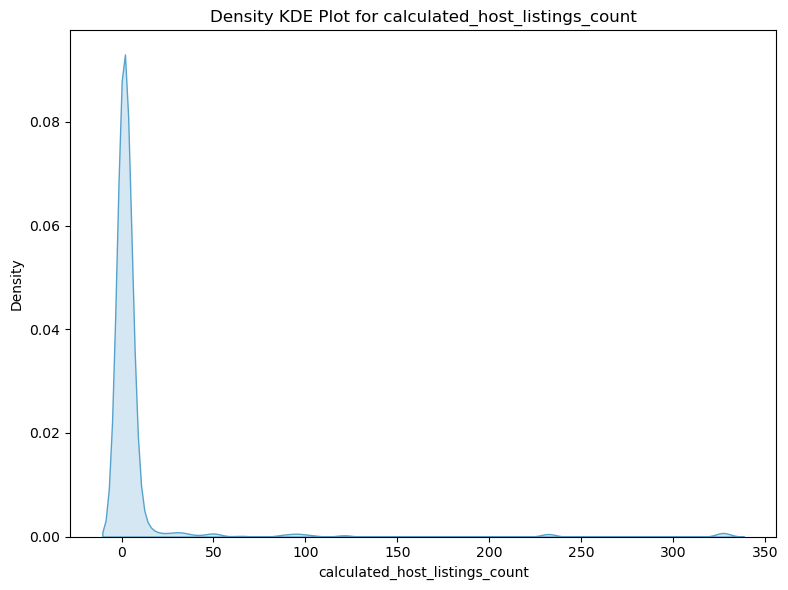

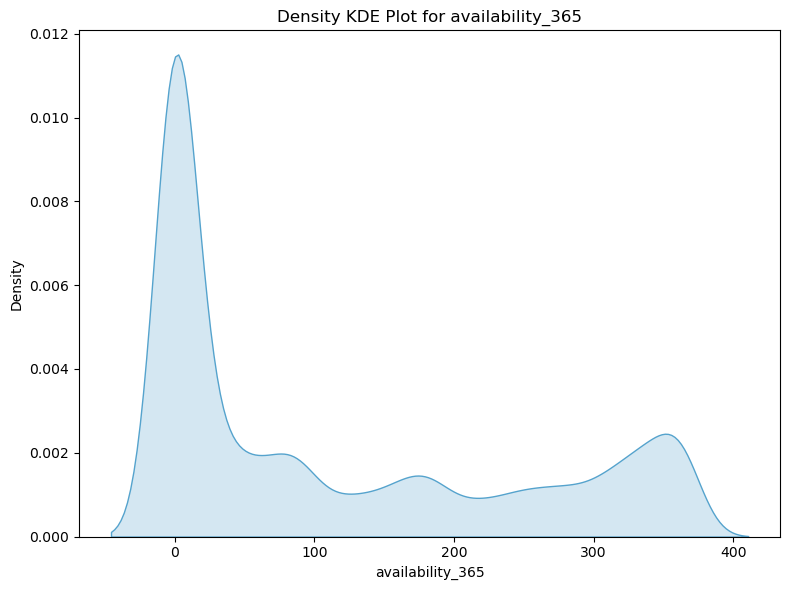

In [184]:
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']

# Set the figure size
plt.figure(figsize=(10, 8))

# Loop through the columns and create a KDE plot for each
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=airbnb[column], fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density KDE Plot for {column}')
    plt.tight_layout()
    plt.show()

In [185]:
# Analyzing the number of nights statistics
airbnb.minimum_nights.describe()


count    48874.000000
mean         7.031387
std         20.514423
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [186]:
airbnb.head(5)

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

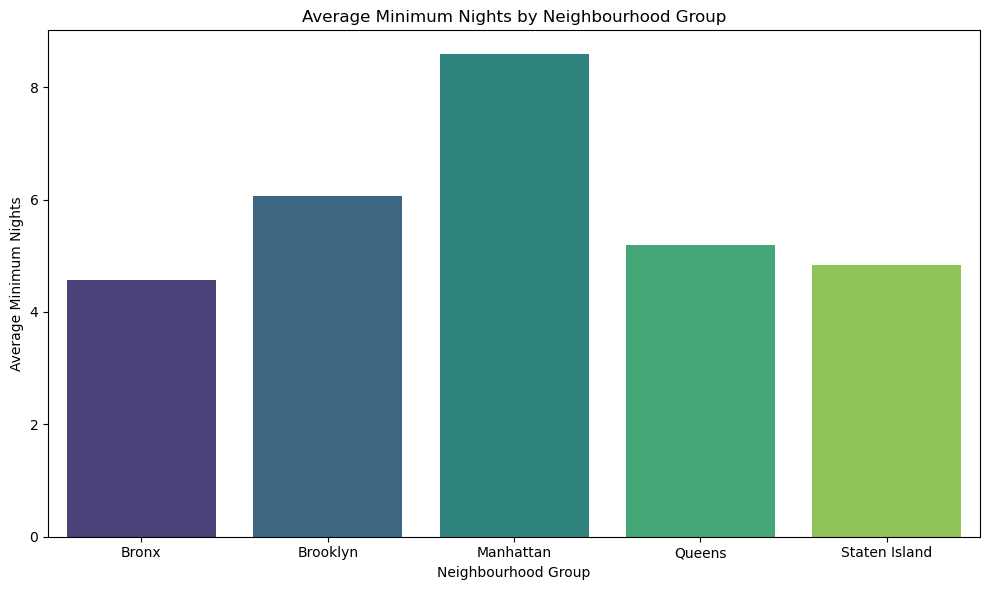

In [188]:
# Group by neighbourhood_group and calculate the mean of minimum_nights
grouped_data = airbnb.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='neighbourhood_group', y='minimum_nights', palette='viridis')

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights by Neighbourhood Group')
plt.tight_layout()

# Display the plot
plt.show()

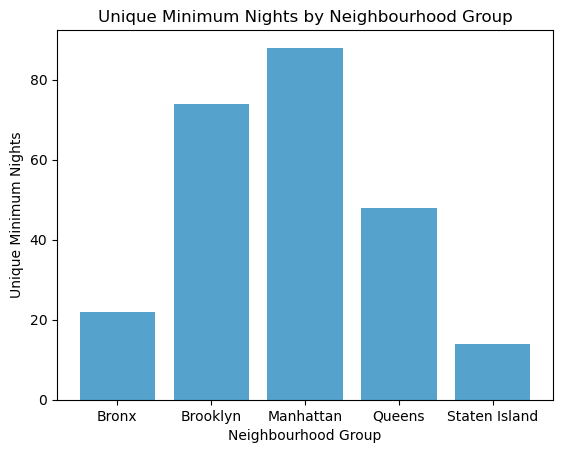

In [190]:
# Barchart showing the minimum nights by Neighbourhood Group

grouped_data = airbnb.groupby('neighbourhood_group')['minimum_nights'].nunique()
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Unique Minimum Nights')
plt.title('Unique Minimum Nights by Neighbourhood Group')
plt.show()

    neighbourhood_group  minimum_nights  count
0                 Bronx               1    362
1                 Bronx               2    357
2                 Bronx               3    180
3                 Bronx               4     35
4                 Bronx               5     55
..                  ...             ...    ...
540       Staten Island             480      0
541       Staten Island             500      0
542       Staten Island             999      0
543       Staten Island            1000      0
544       Staten Island            1250      0

[545 rows x 3 columns]


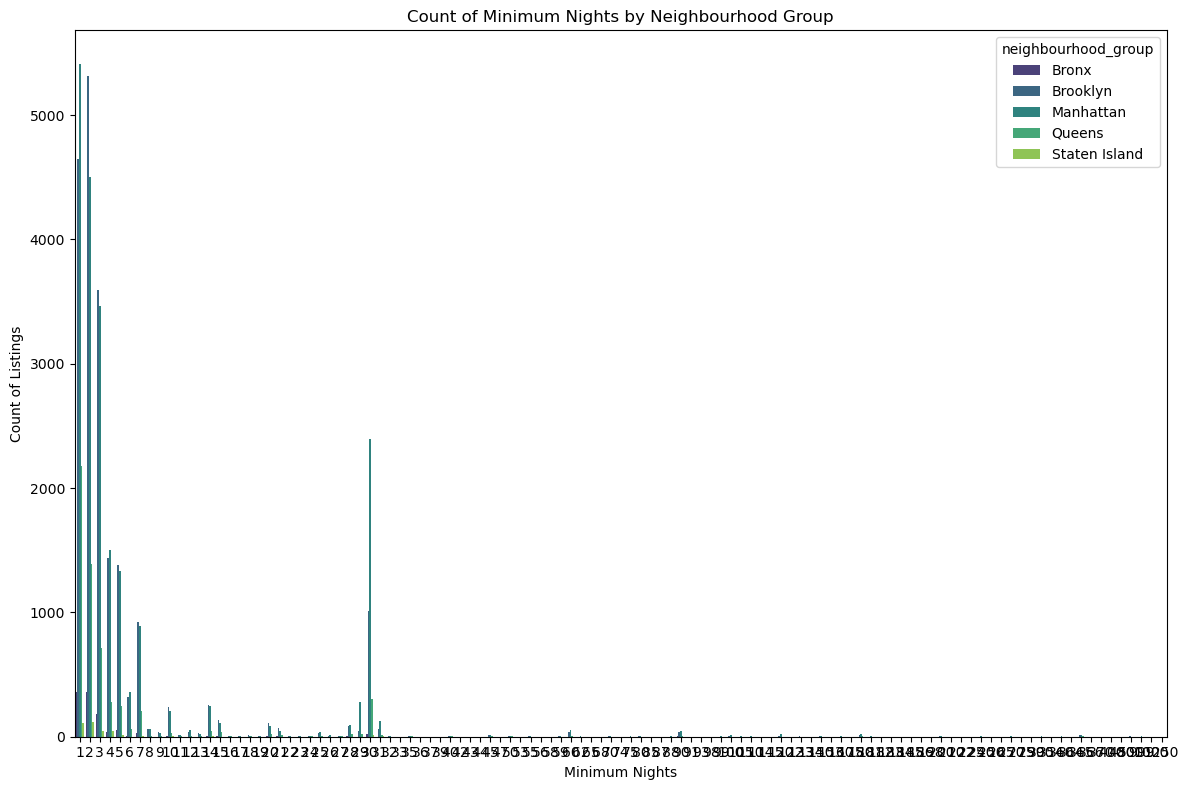

In [191]:
# Group by neighbourhood_group and minimum_nights and count the occurrences
grouped_data = airbnb.groupby(['neighbourhood_group', 'minimum_nights']).size().reset_index(name='count')

# Check the grouped data
print(grouped_data)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='minimum_nights', y='count', hue='neighbourhood_group', palette='viridis')

# Add labels and title
plt.xlabel('Minimum Nights')
plt.ylabel('Count of Listings')
plt.title('Count of Minimum Nights by Neighbourhood Group')
plt.tight_layout()

# Display the plot
plt.show()

In [192]:
# Sort the data frame by minimum_nights descending mode to check higher minimum_nights
sorted_minimum_nights = airbnb.sort_values(by='minimum_nights', ascending=False)
sorted_minimum_nights

host_id  host_name neighbourhood_group      neighbourhood  latitude  \
5767    17550546  Genevieve           Manhattan  Greenwich Village  40.73293   
2854     6676776      Peter           Manhattan  Battery Park City  40.71239   
38664  200401254        Meg           Manhattan  Greenwich Village  40.73094   
26341  151084261      Angie            Brooklyn       Williamsburg  40.71772   
13404    2697686   Glenn H.           Manhattan             Harlem  40.82915   
...          ...        ...                 ...                ...       ...   
21230     283944        Tim            Brooklyn       Williamsburg  40.70669   
37793  225025900        Jas              Queens   Ditmars Steinway  40.77689   
37794  206229239    Mamadou              Queens            Jamaica  40.67748   
37795   30985759        Taz           Manhattan     Hell's Kitchen  40.75964   
0           2787       John            Brooklyn         Kensington  40.64749   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
5767   -73.99782  Entire home/apt    180            1250                  2   
2854   -74.01620  Entire home/apt    400            1000                  0   
38664  -73.99900      Shared room    110             999                  0   
26341  -73.95059     Private room     79             999                 24   
13404  -73.94034  Entire home/apt     99             999                  2   
...          ...              ...    ...             ...                ...   
21230  -73.94648     Private room     85               1                 16   
37793  -73.90730     Private room     60               1                  3   
37794  -73.76376  Entire home/apt    100               1                 12   
37795  -73.99002      Shared room     70               1                 59   
0      -73.97237     Private room    149               1                  9   

       reviews_per_month  calculated_host_listings_count  availability_365  
5767                0.03                               1               365  
2854                0.00                               1               362  
38664               0.00                               1               365  
26341               1.12                               6               249  
13404               0.07                               1                42  
...                  ...                             ...               ...  
21230               0.55                               1                 7  
37793               2.43                               2               363  
37794               1.69                               1               161  
37795               7.47                               6               314  
0                   0.21                               6               365  

[48874 rows x 13 columns]

In [194]:
unique_minimum_nights = airbnb.groupby('host_id')['minimum_nights'].nunique()
sorted_unique_minimum_nights = unique_minimum_nights.sort_values(ascending=False)
sorted_unique_minimum_nights

host_id
7245581      13
23582893      7
51596474      7
322716        5
172369331     5
             ..
12552750      1
12541753      1
12541502      1
12540615      1
274321313     1
Name: minimum_nights, Length: 37439, dtype: int64

In [195]:
# Show the maximum minimum_nights by Neighbourhood groups

max_minimum_nights = airbnb.groupby('neighbourhood_group')['minimum_nights'].max()
sorted_max_minimum_nights = max_minimum_nights.sort_values(ascending=False)
sorted_max_minimum_nights

neighbourhood_group
Manhattan        1250
Brooklyn          999
Queens            500
Bronx             365
Staten Island     365
Name: minimum_nights, dtype: int64

In [196]:
# Show the minimum minimum_nights by Neighbourhood groups
max_minimum_nights = airbnb.groupby('neighbourhood_group')['minimum_nights'].min()
sorted_max_minimum_nights = max_minimum_nights.sort_values(ascending=False)
sorted_max_minimum_nights

neighbourhood_group
Bronx            1
Brooklyn         1
Manhattan        1
Queens           1
Staten Island    1
Name: minimum_nights, dtype: int64

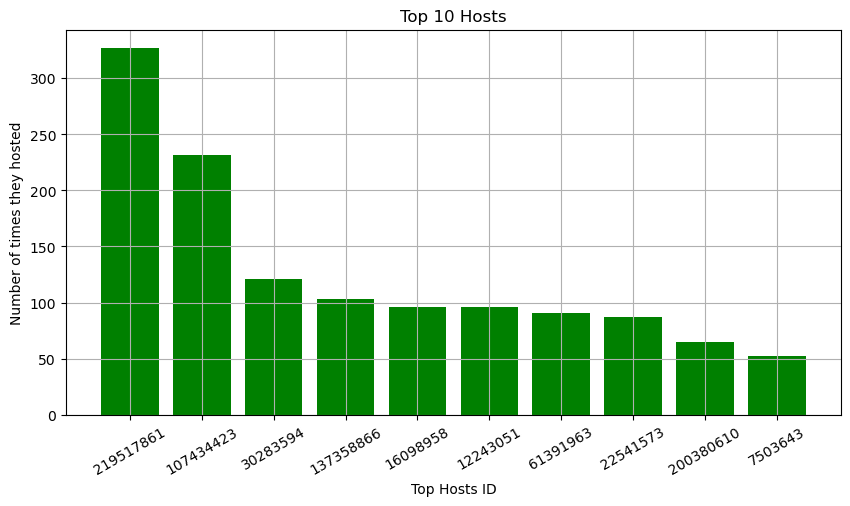

In [197]:
# Visualising who are the top 10 hosts
top_hosts = airbnb['host_id'].value_counts().head(10)
top_hosts_id = list(map(lambda x : str(x) , top_hosts.keys()))
top_hosts_count = list(top_hosts)

top_hosts_count

plt.figure(figsize=(10, 5))
plt.bar(top_hosts_id, top_hosts_count, color = 'g')
plt.grid(True)
plt.title('Top 10 Hosts')
plt.xticks(rotation = 30)
plt.xlabel('Top Hosts ID')
plt.ylabel('Number of times they hosted')
plt.show()

In [198]:
sorted_df = airbnb.sort_values(by='host_id', ascending=False)
sorted_df

host_id  host_name neighbourhood_group       neighbourhood  latitude  \
48888  274321313        Kat           Manhattan      Hell's Kitchen  40.76392   
48886  274311461      Scott           Manhattan             Midtown  40.75561   
48884  274307600   Jonathan            Brooklyn        Williamsburg  40.71790   
48881  274298453     Adrien            Brooklyn          Greenpoint  40.72585   
48875  274273284  Anastasia           Manhattan         East Harlem  40.78749   
...          ...        ...                 ...                 ...       ...   
13583       2787       John            Brooklyn           Gravesend  40.60755   
10372       2787       John            Brooklyn         Bensonhurst  40.60951   
0           2787       John            Brooklyn          Kensington  40.64749   
2290        2571      Teedo            Brooklyn  Bedford-Stuyvesant  40.68674   
30604       2438      Tasos            Brooklyn        Williamsburg  40.71412   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48888  -73.99183     Private room    125               4                  0   
48886  -73.96723  Entire home/apt    200               6                  0   
48884  -73.96238     Private room    190               7                  0   
48881  -73.94001     Private room     54               6                  0   
48875  -73.94749     Private room    140               1                  0   
...          ...              ...    ...             ...                ...   
13583  -73.97410     Private room     79               1                 17   
10372  -73.97622     Private room     99               1                 21   
0      -73.97237     Private room    149               1                  9   
2290   -73.93845  Entire home/apt    182               9                 27   
30604  -73.94447  Entire home/apt     95              45                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
48888               0.00                               1                31  
48886               0.00                               1               176  
48884               0.00                               1               341  
48881               0.00                               1                15  
48875               0.00                               1               180  
...                  ...                             ...               ...  
13583               0.40                               6               174  
10372               0.50                               6               153  
0                   0.21                               6               365  
2290                0.37                               1                23  
30604               0.06                               1                 0  

[48874 rows x 13 columns]

In [199]:
host_id_to_find = 219517861  # Replace with the actual host_id you're looking for
specific_row = airbnb.loc[airbnb['host_id'] == host_id_to_find]

# Now 'specific_row' contains the row corresponding to the specified host_id
specific_row

host_id     host_name neighbourhood_group       neighbourhood  \
38293  219517861  Sonder (NYC)           Manhattan  Financial District   
38294  219517861  Sonder (NYC)           Manhattan  Financial District   
38588  219517861  Sonder (NYC)           Manhattan  Financial District   
39769  219517861  Sonder (NYC)           Manhattan         Murray Hill   
39770  219517861  Sonder (NYC)           Manhattan         Murray Hill   
...          ...           ...                 ...                 ...   
47691  219517861  Sonder (NYC)           Manhattan  Financial District   
47692  219517861  Sonder (NYC)           Manhattan  Financial District   
47693  219517861  Sonder (NYC)           Manhattan  Financial District   
47814  219517861  Sonder (NYC)           Manhattan  Financial District   
47821  219517861  Sonder (NYC)           Manhattan  Financial District   

       latitude  longitude        room_type  price  minimum_nights  \
38293  40.70637  -74.00645  Entire home/apt    302              29   
38294  40.70771  -74.00641  Entire home/apt    229              29   
38588  40.70743  -74.00443  Entire home/apt    232              29   
39769  40.74792  -73.97614  Entire home/apt    262               2   
39770  40.74771  -73.97528  Entire home/apt    255               2   
...         ...        ...              ...    ...             ...   
47691  40.70818  -74.00631  Entire home/apt    135              29   
47692  40.70691  -74.00682  Entire home/apt    165              29   
47693  40.70772  -74.00673  Entire home/apt    165              29   
47814  40.70840  -74.00518  Entire home/apt    699              29   
47821  40.70707  -74.00557  Entire home/apt    699              29   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
38293                  0               0.00                             327   
38294                  1               0.73                             327   
38588                  1               0.60                             327   
39769                  8               1.86                             327   
39770                 14               2.59                             327   
...                  ...                ...                             ...   
47691                  0               0.00                             327   
47692                  0               0.00                             327   
47693                  0               0.00                             327   
47814                  0               0.00                             327   
47821                  0               0.00                             327   

       availability_365  
38293               309  
38294               219  
38588               159  
39769                91  
39770                81  
...                 ...  
47691               339  
47692               342  
47693               347  
47814               327  
47821               341  

[327 rows x 13 columns]

In [200]:
columns_to_extract = ['host_id','neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
specific_row = airbnb.loc[airbnb['host_id'] == host_id_to_find, columns_to_extract]

specific_row

host_id neighbourhood_group        room_type  price  minimum_nights  \
38293  219517861           Manhattan  Entire home/apt    302              29   
38294  219517861           Manhattan  Entire home/apt    229              29   
38588  219517861           Manhattan  Entire home/apt    232              29   
39769  219517861           Manhattan  Entire home/apt    262               2   
39770  219517861           Manhattan  Entire home/apt    255               2   
...          ...                 ...              ...    ...             ...   
47691  219517861           Manhattan  Entire home/apt    135              29   
47692  219517861           Manhattan  Entire home/apt    165              29   
47693  219517861           Manhattan  Entire home/apt    165              29   
47814  219517861           Manhattan  Entire home/apt    699              29   
47821  219517861           Manhattan  Entire home/apt    699              29   

       calculated_host_listings_count  availability_365  
38293                             327               309  
38294                             327               219  
38588                             327               159  
39769                             327                91  
39770                             327                81  
...                               ...               ...  
47691                             327               339  
47692                             327               342  
47693                             327               347  
47814                             327               327  
47821                             327               341  

[327 rows x 7 columns]

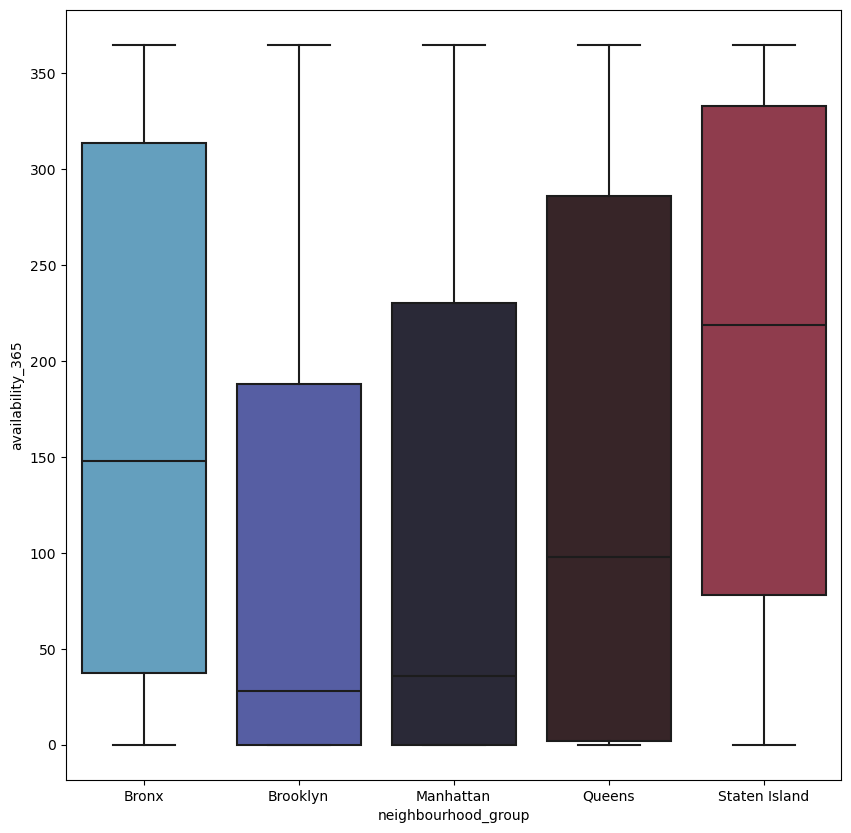

In [201]:
# Code to check the availability of room by the neighbourhood
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')
plt.show()


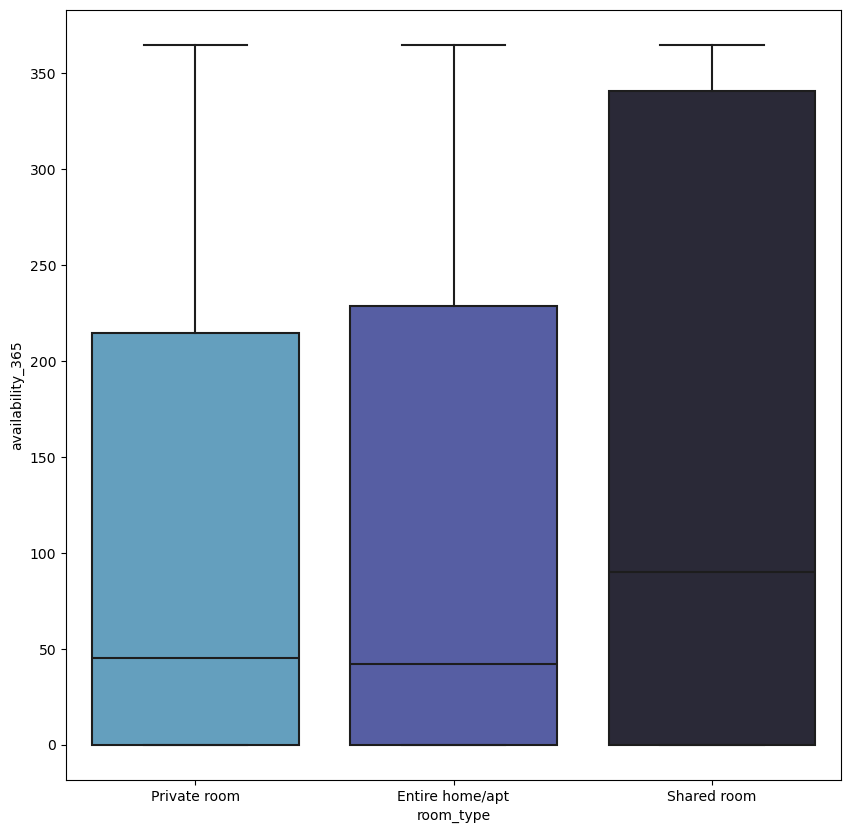

In [202]:
# Checking the availability by room type
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='room_type',y='availability_365')
plt.show()

In [203]:
airbnb.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [204]:
airbnb.head(4)

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194

Regression analysis

In [205]:
# Reload the csv file with a different name
airbnbmodel = pd.read_csv(r'D:\One Drive\OneDrive\data analysis\data cleaning\airbnb new york/AB_NYC_2019.csv')

In [206]:
airbnbmodel.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [207]:
# Drop the unnecessary columns host_id , latitude , longitude , neighbourhood , number_of_reviews , reviews_per_month
airbnbmodel.drop(['id', 'name', 'host_id', 'latitude', 'longitude', 'host_name','last_review','neighbourhood', 'number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)


In [208]:
airbnbmodel.head(5)

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   
3            Brooklyn  Entire home/apt     89               1   
4           Manhattan  Entire home/apt     80              10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [209]:
airbnbmodel.isna().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [210]:
airbnbmodel.duplicated().sum()

12828

In [211]:
# Dropping the missing values
airbnbmodel.dropna(inplace=True)

In [212]:
airbnbmodel.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [213]:
airbnbmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   room_type                       48895 non-null  object
 2   price                           48895 non-null  int64 
 3   minimum_nights                  48895 non-null  int64 
 4   calculated_host_listings_count  48895 non-null  int64 
 5   availability_365                48895 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [214]:
# Changing the columns 'neighbourhood_group', 'room_type' into categorical columns

def Encode(airbnbmodel):
    for column in airbnbmodel.columns[airbnbmodel.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnbmodel[column] = airbnbmodel[column].factorize()[0]
    return airbnbmodel

airbnbmodel_en = Encode(airbnbmodel.copy())

In [215]:
airbnbmodel_en

neighbourhood_group  room_type  price  minimum_nights  \
0                        0          0    149               1   
1                        1          1    225               1   
2                        1          0    150               3   
3                        0          1     89               1   
4                        1          1     80              10   
...                    ...        ...    ...             ...   
48890                    0          0     70               2   
48891                    0          0     40               4   
48892                    1          1    115              10   
48893                    1          2     55               1   
48894                    1          0     90               7   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[48895 rows x 6 columns]

In [216]:
airbnbmodel_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             48895 non-null  int64
 1   room_type                       48895 non-null  int64
 2   price                           48895 non-null  int64
 3   minimum_nights                  48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


In [217]:
unique_values = airbnbmodel_en['neighbourhood_group'].unique()
unique_values

array([0, 1, 2, 3, 4], dtype=int64)

In [218]:
# airbnbmodel_en.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [219]:
airbnbmodel_en.head(5)

neighbourhood_group  room_type  price  minimum_nights  \
0                    0          0    149               1   
1                    1          1    225               1   
2                    1          0    150               3   
3                    0          1     89               1   
4                    1          1     80              10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

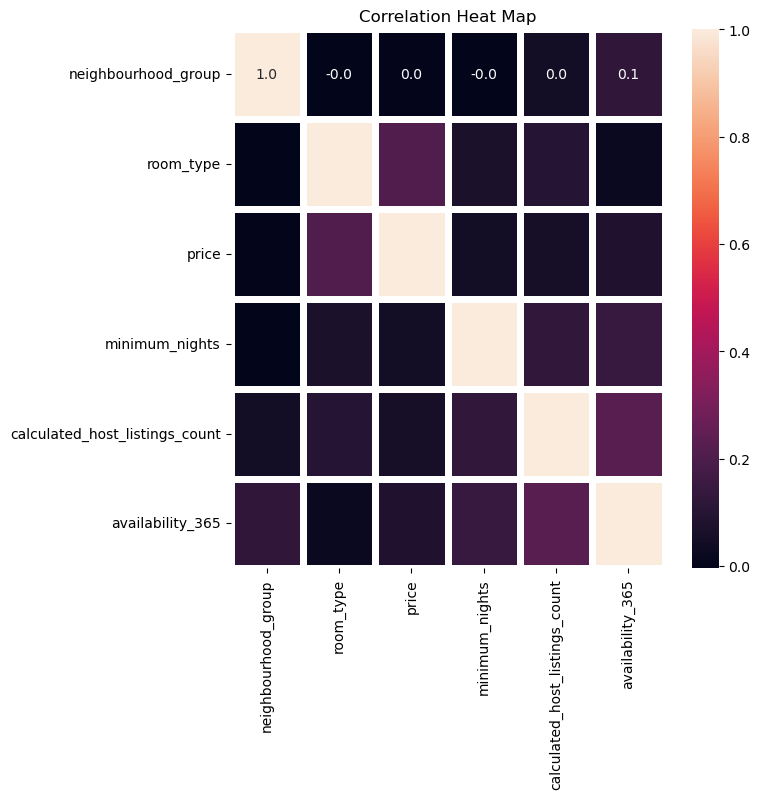

In [220]:
# Correlation Heatmap visualization code

# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')

# Use only numeric columns for correlation matrix
sns.heatmap(airbnbmodel_en.corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

plt.show()

In [221]:
# table about the correlation of these variables
# 
airbnbmodel_en.corr()

neighbourhood_group  room_type     price  \
neighbourhood_group                        1.000000  -0.004441  0.002672   
room_type                                 -0.004441   1.000000  0.206027   
price                                      0.002672   0.206027  1.000000   
minimum_nights                            -0.000739   0.066767  0.042799   
calculated_host_listings_count             0.044510   0.096963  0.057472   
availability_365                           0.123287   0.026502  0.081829   

                                minimum_nights  \
neighbourhood_group                  -0.000739   
room_type                             0.066767   
price                                 0.042799   
minimum_nights                        1.000000   
calculated_host_listings_count        0.127960   
availability_365                      0.144303   

                                calculated_host_listings_count  \
neighbourhood_group                                   0.044510   
room_type                                             0.096963   
price                                                 0.057472   
minimum_nights                                        0.127960   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
neighbourhood_group                     0.123287  
room_type                               0.026502  
price                                   0.081829  
minimum_nights                          0.144303  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

In [222]:
# importing the libraries for linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [223]:
# Knowing the number of my columns of the data frame
airbnbmodel_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             48895 non-null  int64
 1   room_type                       48895 non-null  int64
 2   price                           48895 non-null  int64
 3   minimum_nights                  48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


In [224]:
airbnbmodel_en.shape


(48895, 6)

In [225]:

# linear regresion in this case we select as the independent variable the price column
x = airbnbmodel_en.iloc[:,[0,1,3,4,5]] # .iloc: This is a pandas attribute used for selecting rows and columns by integer position (indexing).
y = airbnbmodel_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [226]:
x_train.shape


(44005, 5)

In [227]:
y_train.shape


(44005,)

In [228]:
#Prepare a Linear Regression Model
# With this code we get the R-squared score in this case is 0.074...
# which means that these variables are not very significant to this model

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07480306392848757

In [229]:
#Prepairng a Decision Tree Regression
#  so with this regression model we got a low rate as well

from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.25340847089993634

In [230]:
sample = airbnbmodel_en.sample(1000).corr()
sample

neighbourhood_group  room_type     price  \
neighbourhood_group                        1.000000  -0.014933  0.032377   
room_type                                 -0.014933   1.000000  0.177383   
price                                      0.032377   0.177383  1.000000   
minimum_nights                            -0.031431   0.113957 -0.005978   
calculated_host_listings_count             0.040549   0.094207  0.056431   
availability_365                           0.111918  -0.034847  0.041840   

                                minimum_nights  \
neighbourhood_group                  -0.031431   
room_type                             0.113957   
price                                -0.005978   
minimum_nights                        1.000000   
calculated_host_listings_count        0.079637   
availability_365                      0.159239   

                                calculated_host_listings_count  \
neighbourhood_group                                   0.040549   
room_type                                             0.094207   
price                                                 0.056431   
minimum_nights                                        0.079637   
calculated_host_listings_count                        1.000000   
availability_365                                      0.250170   

                                availability_365  
neighbourhood_group                     0.111918  
room_type                              -0.034847  
price                                   0.041840  
minimum_nights                          0.159239  
calculated_host_listings_count          0.250170  
availability_365                        1.000000

In [231]:
# Here, the small positive slope suggests that, on average, 
# there's a very slight increase in price associated with a one-unit increase in the numerical value assigned to a room type category.
# this code show the coefficients
reg = np.polyfit(airbnbmodel_en['price'], airbnbmodel_en['room_type'], deg=1)
reg

array([4.64334785e-04, 4.96199674e-01])

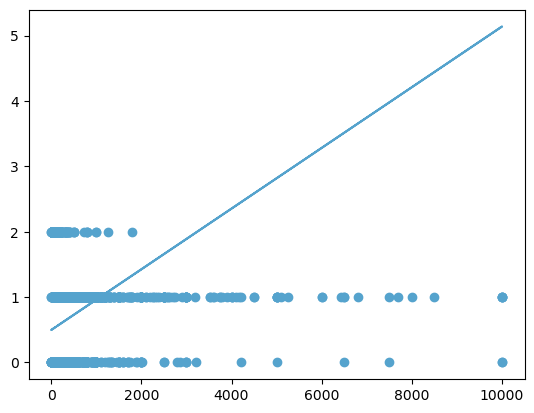

In [232]:
trend = np.polyval(reg, airbnbmodel_en['price'])
plt.scatter(airbnbmodel_en['price'], airbnbmodel_en['room_type'])
plt.plot(airbnbmodel_en['price'], trend);